# Molecule Data Example

In [23]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import signal
import scipy as sc

In [24]:
# load molecules from https://figshare.com/articles/Graphs_of_materials_project/7451351

with open('/home/robert/Documents/PythonCode/DynGDim/examples/datasets/molecules/mp.2018.6.1.json') as json_file:
    data = json.load(json_file)
    
# only look at molecules with bulk and shear moduli available   
    
mols = []
for mol in data:
    if 'G' in list(mol.keys()):
        mols.append(mol)
    


In [25]:
#  construct graph from bond energies

data = []    

keys = set(x for l in mols for x in l)

G = np.zeros(len(mols))
K = np.zeros(len(mols))
band_gap = np.zeros(len(mols))
formation_energy = np.zeros(len(mols))
G[:] = np.nan
K[:] = np.nan
band_gap[:] = np.nan
formation_energy[:] = np.nan

labels = []
graphs = []
node_features = []

for i,mol in enumerate(mols):
    graph = mol['graph']    
    edges = pd.DataFrame(columns=['source','target','weight'])
    edges['source'] = graph['index1']
    edges['target'] = graph['index2']
    edges['weight'] = graph['bond']
    edges = edges.groupby(['source','target']).sum()
    edges.reset_index(level=1, inplace=True)
    edges.reset_index(level=0, inplace=True)
    g = nx.from_pandas_edgelist(edges, edge_attr=True)
    
    # convert to numpy array
    g = nx.to_numpy_array(g)
    
    # get node features (N x f)
    node_feats = np.asarray(graph['atom'])
    node_feat_matrix = np.zeros((node_feats.size, 100))
    node_feat_matrix[np.arange(node_feats.size),node_feats] = 1

    
    # append to graphs list
    graphs.append(g)
    labels.append(mol['band_gap'])
    node_features.append(node_feat_matrix)

    G[i] = mol['G']
    K[i] = mol['K']
    band_gap[i] = mol['band_gap']
    formation_energy[i] = mol['formation_energy_per_atom']

In [16]:
from hcga.graph import Graph, GraphCollection

# create graph collection object
g_c = GraphCollection()


# looping over each graph and appending it to the graph collection object
for i,A in enumerate(graphs):
    
    # generating a sparse matrix
    sA = sc.sparse.coo_matrix(A)
    
    # extracting edge list from scipy sparse matrix
    edges = np.array([sA.row,sA.col,sA.data]).T
    
    # passing edge list to pandas dataframe
    edges_df = pd.DataFrame(edges, columns = ['start_node', 'end_node', 'weight'])

    # creating node ids based on size of adjancency matrix
    nodes = np.arange(0,A.shape[0])
    
    # loading node ids into dataframe
    nodes_df = pd.DataFrame(index=nodes)

    # each node should have the same number of node features across all graphs
    # converting node features array to list such that each node is assigned a list.
    nodes_df['attributes'] = node_features[i].tolist()

    # extracting graph label from labels
    graph_label = [labels[i]]
    
    # create a single graph object
    graph = Graph(nodes_df, edges_df, graph_label, 'p_edge')

    # add new graph to the collection
    g_c.add_graph(graph)


In [17]:
# perform some sanity checks

print('There are {} graphs'.format(len(g_c.graphs)))
print('There are {} features per node'.format(g_c.get_n_node_features()))


There are 5830 graphs
There are 100 features per node


In [18]:
# we can save this if we want to and run everything from the command line
from hcga.io import save_dataset

save_dataset(g_c, 'custom_dataset_molecules', folder='./datasets')

# Extracting features

We have now produced a pickle dataset of your own custom data. We can now run the feature extraction from the command line using the following commands:

hcga extract_features ./datasets/custom_dataset.pkl -m fast -n 4 -sl advanced --timeout 10 


Alternatively,we could import the Hcga class and run the feature extraction and analysis from within the notebook. We will do this below.

In [19]:
from hcga.io import load_dataset

graphs = load_dataset('./datasets/custom_dataset_molecules.pkl')

In [20]:
#import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

#assigning the graphs field to the recently created dataset
h.graphs = graphs

In [54]:
# extracting all features here
h.extract(mode='slow',n_workers=4,timeout=20)

# saving all features into a pickle
h.save_features('./results/custom_dataset_molecules/all_features.pkl')


Returning the maximal subgraph for each graph


invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice


Extracting features from 5475 graphs (we disabled 355 graphs).
Computing features for 5475 graphs:


invalid value encountered in log
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in double_scalars
  0%|          | 0/5475 [00:00<?, ?it/s]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions

DEBUG:Feature exceptions:Failed feature max_num_components for graph 8 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 8 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 8 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 8 with exception: {0} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encou

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  0%|          | 8/5475 [01:43<27:04:18, 17.83s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature num_connectivity_levels_k for graph 10 took longer than 20 seconds
DEBUG:Feature exceptions:Feature max_num_components for graph 9 took longer than 20 seconds
DEBUG:Feature exceptions:Feature size_2_component for graph 4 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 11 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 11 with exceptio

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 18 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 18 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 18 with exception: k cannot be bigger than the number of nodes.
  0%|          | 15/5475 [02:59<15:52:52, 10.47s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
DEBUG:Feature exceptions:Feature omega for graph 16 took longer than 20 seconds
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty

invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=4.0 for graph 24 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=4.0 for graph 24 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=4.0 for graph 24 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=4.0 for graph 24 with exception: k cannot be bi

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 24 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 24 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 24 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 24 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 24 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 24 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 24 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 27 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 27 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 27 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 27 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 27 with exception: index 8 is out of bounds for axis 0 with size 8
divide by zero encountered in log
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  0%|          | 26/5475 [04:09<11:08:02,  7.36s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_sc

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 32 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 32 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 32 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 32 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 32 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 32 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 32 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

  1%|          | 35/5475 [05:26<10:55:06,  7.23s/it]invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 39 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 39 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 39 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 39 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 37 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 37 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Feature omega for graph 38 took longer than 20 seconds
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 37 with exception: {12} is not an independent set of G
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encounter

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 42 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 42 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature size_2_component for graph 46 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Feature size_max_k_component for graph 40 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 46 with exception: {8} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
  1%|          | 45/5475 [07:05<17:09:36, 11.38s/it]invalid value encountered in double_scalars
An input array is constant; the correlation coef

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 53 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for grap

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 53 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 53 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 53 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 53 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 53 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 53 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 53 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 55 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 55 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 55 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 55 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 55 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 55 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 55 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  1%|          | 55/5475 [08:18<9:22:06,  6.22s/it] Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 51 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 57 took longer than 20 seconds
DEBUG:Feature exceptions:Feature size_2_component for graph 47 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 58 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 47 with exception: {16} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 59 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 59 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 59 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 59 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 59 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 59 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 59 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 62 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 63 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 63 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 63 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 63 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 63 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 63 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 63 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 68 with exception: k cannot be bigger than the number of nodes.
  1%|          | 65/5475 [09:39<12:26:06,  8.27s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invali

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 69 with exception: k cannot be bigger than the number of nodes.
  1%|          | 66/5475 [09:43<10:29:42,  6.99s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_con

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 70 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 70 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
  1%|          | 67/5475 [09:45<8:37:06,  5.74s/it] divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 69 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 69 with exception: i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 71 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 71 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 71 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 71 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 71 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 71 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 71 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 70 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 70 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 70 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 70 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 70 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 70 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 70 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 75 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 76 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 76 with exception: k cannot be bigger than the number of nodes.
  1%|▏         | 73/5475 [10:02<4:02:19,  2.69s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 75 with exception: index 4 is out of bounds for axis 0 with size

invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 77 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Faile

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 74 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 74 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 74 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 74 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 74 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 74 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 74 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 76 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 76 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 76 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 76 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 76 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 76 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 76 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 78 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 78 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 78 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 78 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 78 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 78 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 78 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 82 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 82 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 82 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 82 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 82 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 82 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 82 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 83 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 83 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 83 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 83 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 83 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 83 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 83 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 87 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 87 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 87 with exception: k cannot be bigger than the number of

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 85 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 85 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 85 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 85 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 85 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 85 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid v

DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 89 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for gr

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 90 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 90 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 90 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 90 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 87/5475 [10:48<5:53:00,  3.93s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 91 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 91 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 92 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 89/5475 [10:50<3:31:42,  2.36s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 93 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 90/5475 [10:53<3:54:37,  2.61s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 92 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eig

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 94 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 91/5475 [10:54<3:13:02,  2.15s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 94 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 94 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptio

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 95 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 95 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 95 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 95 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 95 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 95 with exception: index 5 is out of bounds for axis 0 with siz

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 96 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 96 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 96 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 96 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 96 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 96 with exception: index 5 is

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 90 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 90 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 90 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 90 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 90 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 90 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 90 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 99 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 99 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 99 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 99 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 99 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 96/5475 [11:10<4:02:17,  2.70s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature e

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 99 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 99 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 99 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 99 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 99 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  2%|▏         | 98/5475 [11:23<6:53:55,  4.62s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 100 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 102 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 100 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 102 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 102 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 102 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 102 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature eigenv

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 98 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 98 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 104 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 104 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 105 with exception: k cannot be bigger th

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 104 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 104 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 104 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 104 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 104 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 104 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 104 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 106 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 106 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 106 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 106 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 106 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 106 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 106 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 110 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 110 with exce

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 108 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for gra

invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 110 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 110 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 110 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 110 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 110 

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 112 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 112 with exception: index 9 is

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 117 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 117 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 117 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 117 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 117 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_

divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 116 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 116 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 116 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 116 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exception

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 115 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 115 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 115 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 115 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 115 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 115 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 115 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  2%|▏         | 121/5475 [12:44<6:51:54,  4.62s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 120 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 120 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 120 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 120 with exception: ('Co

invalid value encountered in double_scalars
  2%|▏         | 123/5475 [12:52<6:00:52,  4.05s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 123 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value en

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 128 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 128 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 128 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 128 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 128 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 128 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 128 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 130 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 130 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 130 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 130 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 130 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 130 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 130 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 131 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 131 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

  2%|▏         | 132/5475 [14:06<12:21:44,  8.33s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 135 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 135 with exceptio

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 138 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 138 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 138 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 138 with exception: k cannot be bigger than the number of nodes.
  2%|▏         | 134/5475 [14:20<11:29:16,  7.74s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 136 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 136 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Featur

DEBUG:Feature exceptions:Failed feature max_num_components for graph 138 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 138 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 138 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 138 with exception: {5} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
inv

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 140 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 140 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 140 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  3%|▎         | 139/5475 [14:45<6:09:12,  4.15s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 139 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 145 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 145 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 145 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 145 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 145 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 145 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 145 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 146 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 146 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 146 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 146 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 146 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 146 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 146 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 149 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 149 with exception: index 8 is out of bounds for axis 0 with size 8
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  3%|▎         | 148/5475 [15:22<5:32:37,  3.75s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptio

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 153 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 153 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 153 with exception: index 9 is out of bounds for axis 0 with size 9
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 152 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 155 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 155 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 155 with exception: k cannot

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 158 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 158 with exception: k cannot be bigger than the number of nodes.
  3%|▎         | 154/5475 [15:55<7:27:06,  5.04s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenva

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 157 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 157 with exception: index 8 is out of bounds for axis 0 with size 8
divide by zero encountered 

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 162 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 162 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 162 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 162 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 162 with exception: index 7 is

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 165 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

  3%|▎         | 162/5475 [16:42<8:18:25,  5.63s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 163 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature size_2_component for graph 148 t

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 167 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 167 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 167 with exception: index 9 is out of bounds for axis 0 with size 4
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 167 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 167 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 167 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 167 with exception: index 6 is out of bounds for axis 0 with 

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 170 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

  3%|▎         | 167/5475 [16:57<4:25:34,  3.00s/it]invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 170 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 170 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 170 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 170 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 170 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 170 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature ex

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 169 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 169 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 169 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 169 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 159 took longer than 20 seconds
  3%|▎         | 169/5475 [17:11<8:21:40,  5.67s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is consta

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 174 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 174 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 174 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 174 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 174 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 174 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 174 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 179 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 179 with exception: index 4 is out of bounds for axis 0 with size 4
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 179 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 179 with exception: index 4 is 

DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 181 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 181 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 181 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 181 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 181 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 181 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 181 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 181 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 187 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 187 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 187 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 187 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 187 with exception: k cannot be bigger than the number of nodes.
  3%|▎         | 183/5475 [18

invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  3%|▎         | 185/5475 [18:26<5:12:46,  3.55s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 191 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 191 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 191 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 191 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 191 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 191 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 191 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 188 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 188 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 188 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 188 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 188 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 188 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 188 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 193 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 193 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 193 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 193 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 193 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 193 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 193 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 196 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 196 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 196 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 196 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 196 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 196 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 196 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 198 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 198 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 198 with exception: {2} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 198 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 198 with exception: index 7 is out of bounds for

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 200 with exception: index 9 is out of bounds for axis 0 with size 9
invalid value encountered i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 203 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 203 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 203 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 203 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 203 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 203 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 203 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 205 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 205 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 205 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 205 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 205 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 205 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 205 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 206 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 206 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 206 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 206 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 206 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 206 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 206 with exception: index 6 is out of bounds for ax

invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature num_connectivity_levels_k for graph 199 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 207 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 208 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  4%|▍         | 206/5475 [20:04<10:58:54,  7.50s/it]Mean of empty slice.
invalid valu

DEBUG:Feature exceptions:Feature omega for graph 210 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  4%|▍         | 209/5475 [20:26<11:35:02,  7.92s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 211 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of f

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 215 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 216 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 216 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 216 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 216 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 216 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 216 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 216 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 215 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 215 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 215 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 215 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 215 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 215 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 215 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 218 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 218 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 218 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 218 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 218 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 218 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 218 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 220 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 220 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 220 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 220 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 220 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 220 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 220 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 221 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 221 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 221 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 221 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 221 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 221 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 221 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 219 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 219 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 219 with exception: index 9 is out of bounds for axis 0 with size 9
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 223 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 223 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 223 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_leas

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 224 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=1

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 225 with exception: k cannot be bigger than the number of nodes.
  4%|▍         | 221/5475 [21:24<5:52:47,  4.03s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 213 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 223 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 223 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 223 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 223 with exception: ('Conne

Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 225 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 225 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 225 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 227 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 227 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 227 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 227 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 227 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 227 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 227 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 229 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 229 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 229 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 229 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 229 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 229 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 229 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 226 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 226 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 230 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 230 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 230 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 230 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 230 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 230 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 230 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 233 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 233 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 233 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 233 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 233 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 233 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 233 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 234 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 234 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 237 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 237 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 237 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 237 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 239 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 239 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptio

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 237 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 237 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 237 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 237 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 237 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 237 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 237 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 241 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 241 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 241 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 241 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 241 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 241 with e

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 239 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 239 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 242 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 242 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 242 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 242 with exception: k cannot be bigger than the nu

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 241 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 241 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  4%|▍         | 239/5475 [22:45<3:48:56,  2.62s/it]Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
DEBUG:Feature exceptions:Feature max_num_components for graph 231 took longer than 20 seconds
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 244 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 244 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 244 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 244 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in true_divide
invalid value encountered in double_scalars
  4%|▍         | 240/5475 [22:48<4:04:00,  2.80s/it]Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 245 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 246 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 246 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 246 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 246 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 246 with exception: k cannot be bigger than the number of nodes.
  4%|▍         | 242/5475 [22:54<3:47:57,  2.61s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 247 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 246 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 246 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 246 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 246 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 246 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 246 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 246 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 249 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 249 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 249 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 249 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 249 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 249 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 248 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 248 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 248 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 248 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 248 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 248 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 248 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 256 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 258 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 258 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 258 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 258 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 258 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 258 with exception: k cannot be bigger than

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 258 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 258 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 258 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 258 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 258 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 258 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 258 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 262 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 259 with exception: index 7 is out of bounds for axis 0 with size 7
DEB

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 261 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 261 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 261 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 261 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 261 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 261 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 262 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 262 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 262 with exception: {4} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 262 with exception: index 5 is out of b

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 264 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 269 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 269 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 269 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 269 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 269 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 269 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 269 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 267 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 267 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 267 with exception: index 9 is out of bounds for a

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 276 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 276 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 276 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 276 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 276 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 276 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 276 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 276 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_0 for graph 279 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_1 for graph 279 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_2 for graph 279 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 279 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed

DEBUG:Feature exceptions:Failed feature size_2_component for graph 277 with exception: ('Connectivity is undefined ', 'for the null graph.')
  5%|▌         | 275/5475 [25:00<5:10:59,  3.59s/it]invalid value encountered in log
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 277 with exception: {2} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 277 with exception: index 5 is ou

DEBUG:Feature exceptions:Feature omega for graph 275 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 275 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 275 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 275 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 275 with exception: ('Connectivity is undefined ', 'for the null graph.')
divide by zero encountered in log
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 275 with exception: {7} is not an independent set of G
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 281 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 281 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 281 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 281 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 281 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 281 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 281 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 283 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 283 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 283 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 283 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 283 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 283 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 283 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 284 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 284 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 284 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 284 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 284 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 284 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 284 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 282 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 282 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 282 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 282 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 282 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 282 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 282 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 280 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 280 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 280 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 280 with exception: index 8 is out of bounds for axis 0 with size 7
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  5%|▌         | 282/5475 [25:19<3:58:56,  2.76s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 278 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 285 with exception: ('Connectivity is undefined ', 'for the null graph.'

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 288 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 289 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 289 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 289 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 289 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 289 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 289 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 289 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 289 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 290 with exception: index 7 is out of bounds for axis 0 with size 6
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 290 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 290 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 290 with exception: index 7 is out of bounds for axis 0 with size 6
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 290 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 290 with exception: index 6 is out of bounds for axis 0 with size 6
Mean of empty slice.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 290 with

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 294 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 294 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 294 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 294 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 294 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 294 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 294 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 295 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 295 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 295 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 295 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 295 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 295 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 295 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 291 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 291 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 291 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 291 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 291 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 291 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 291 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 297 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 297 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 297 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 297 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 297 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 297 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 297 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 293 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 293 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 293 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 293 with exception: index 8 is out of bounds for axis 0 with size 8
Mean of empty slice.
invalid value encountered in log
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 299 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 299 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 299 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 299 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 299 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 299 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 299 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 299 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 299 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 300 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 300 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 300 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 300 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 300 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 300 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 300 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 301 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 301 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 301 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 301 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 301 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 301 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 301 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 302 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 302 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 302 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 302 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 302 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 302 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 302 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 304 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 304 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 304 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 304 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 304 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 304 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 304 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 303 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 303 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 303 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 303 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 303 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 303 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 303 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 308 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Feature omega for graph 307 took longer than 20 seconds
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  6%|▌         | 306/5475 [26:42<7:37:27,  5.31s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 309 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 309 wit

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 310 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 312 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 312 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 312 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 312 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 312 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 312 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 312 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 314 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 314 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 314 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 314 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 314 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 314 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 314 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

  6%|▌         | 312/5475 [27:19<8:39:56,  6.04s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 307 took longer than 20 seconds
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 317 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 317 with exce

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 316 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 316 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 316 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 316 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 316 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 316 with exce

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 320 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 320 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 320 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 320 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 320 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 320 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 320 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 322 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 322 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 323 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 323 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 323 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 323 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 323 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 323 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 323 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 326 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 326 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 326 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_

DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 328 with exception: k cannot be bigger than the number of nodes.
  6%|▌         | 323/5475 [28:24<8:32:09,  5.96s/it] di

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 328 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 328 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 328 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 328 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 328 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 328 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 328 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  6%|▌         | 326/5475 [28:30<5:40:09,  3.96s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 319 took longer than 20 seconds
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in doubl

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 332 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 332 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 332 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
  6%|▌         | 327/5475 [28:35<6:10:28,  4.32s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
M

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 332 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 332 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 332 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 334 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 334 with exception: k cannot be bigger than the n

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 334 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 334 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 334 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 334 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 334 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 334 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 334 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 338 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 338 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 338 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 338 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 338 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
  6%|▌         | 333/5475 [29:15<9:12:22,  6.45s/it]divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slic

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 340 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 340 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 340 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 340 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 340 with exception: k cannot be bigger than the number of nodes.
  6%|▌         | 335/5475 [29:22<7:34:10,  5.30s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 336 took longer than 20 seconds
divide by zero encountered

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 341 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 341 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 341 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 341 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 341 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 341 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 341 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 344 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 fo

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 344 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 344 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 344 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 344 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 344 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 344 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 344 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 345 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 345 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 345 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 345 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 345 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 347 with exception: k cannot be bigger th

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 347 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  6%|▋         | 343/5475 [29:48<4:24:32,  3.09s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 343 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 342 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 343 with exception: {3} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value en

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 346 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 346 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 351 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 351 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 351 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 351 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exce

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 350 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 350 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
  6%|▋         | 347/5475 [30:06<6:56:26,  4.87s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 351 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 351 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 351 with exception: ('Connectivity is undefined ', 'for t

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 353 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 353 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 353 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 353 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 353 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 353 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 353 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 353 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 357 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 357 with exception: k canno

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 357 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 357 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 357 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 357 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 357 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 357 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 357 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 358 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 358 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 358 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 358 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 358 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 358 with exception: index 5 is out of bounds for axis 0 with size 5
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 358 with exception: index 7 is out of bounds for axis 0 with s

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 361 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 361 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 361 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 361 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 361 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 361 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 361 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 362 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 362 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 362 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 362 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 362 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 362 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 362 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 364 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 364 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 364 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 364 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 364 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 364 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 364 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 367 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 367 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 367 with exception: {5} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature excepti

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 371 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 371 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 371 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 371 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 371 with exception: k cannot be bigger than the number of nodes.
  7%|▋         | 364/5475 [31:38<13:13:38,  9.32s/it]divide by zero en

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 372 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 373 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 373 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 373 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 373 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 373 with exception: k cannot be bigger than the number of nodes.
  7%|▋         | 366/5475 [31:56<13:18:22,  9.38s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature max_num_components for graph 365 took longer than 20 seconds
DEBUG:Feature exceptions:Feature 

invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 373 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 373 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 373 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 373 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 374 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 374 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 374 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 374 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 374 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 374 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 374 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 376 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 376 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  7%|▋         | 372/5475 [32:25<6:07:48,  4.32s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 375 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 375 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 375 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 375 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feat

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 378 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 378 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 378 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 378 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 378 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 378 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 378 with exception: index 8 is out of bounds for axis 0 with size 7
invalid value encountered i

  7%|▋         | 375/5475 [32:33<4:30:38,  3.18s/it]Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 381 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 381 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 381 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature excep

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 384 with exception: k cannot be bigger than the number of nodes.
  7%|▋         | 377/5475 [32:47<7:42:23,  5.44s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.


DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 385 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
  7%|▋         | 378/5475 [32:52<7:20:16,  5.18s/it]Mean of empty slice.


DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 387 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 387 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 387 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 387 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 387 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 387 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
  7%|▋         | 382/5475 [33:01<4:14:09,  2.99s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
DEBUG:Feature exception

Mean of empty slice.
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 392 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 392 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 392 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 392 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 392

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 393 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 393 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 393 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 393 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 393 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 393 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
  7%|▋         | 388/5475 [33:28<4:27:37,  3.16s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 392 with exception: ('Connectivity is undefin

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 394 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 394 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 394 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 394 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 394 with exception: index 7 is out of bou

DEBUG:Feature exceptions:Feature omega for graph 395 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 398 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 398 with exception: k cannot be bigger than 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 398 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 398 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 398 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 398 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 398 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 400 with exception: k cannot be bigger than the number of nodes.
DEBUG:Fe

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 403 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 404 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 404 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 404 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 404 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 404 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 404 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 404 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature max_num_components for graph 406 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 406 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 406 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 406 with exception: {1} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars


DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 407 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 407 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 407 with exception: k cannot be bigger than the number of nodes.
  7%|▋         | 400/5475 [34:33<8:29:36,  6.02s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid 

DEBUG:Feature exceptions:Feature size_max_k_component for graph 391 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 408 took longer than 20 seconds
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 408 with exception: {0} is not an independent set of G
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 408 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 408 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 408 with exception

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 411 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 411 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 411 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 411 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 411 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 411 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 411 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature max_num_components for graph 413 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 413 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 413 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 413 with exception: {1} is not an independent set of G
divide by zero encountered in log
DEBUG:Feature exceptions:Feature size_max_k_component for graph 401 took longer than 20 seconds
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 415 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 415 with exception: k cannot be bigger than the number of nodes.
  7%|▋         | 408/5475 [35:35<10:28:30,  7.44s/it]Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 416 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 416 with exception: index 9 is out of bounds for axis 0 with size 8
An input array is constant; the correlation coefficent is not defined.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 416 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 416 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 416 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 416 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 417 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 417 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 417 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 420 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 420 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 420 with exception: k cannot be bigger than the

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 422 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 423 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 423 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 423 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 423 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 423 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 423 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 423 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 423 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 426 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 426 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 426 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 426 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 426 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 427 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature r

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 427 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 427 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 427 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 427 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 427 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 427 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
D

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 429 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 429 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 429 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 429 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 429 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 429 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 429 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 430 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 430 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 430 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 430 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 430 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 430 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 430 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 431 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 431 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 431 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 431 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 431 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 431 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 431 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
  8%|▊         | 427/5475 [36:54<5:44:10,  4.09s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature omega for graph 434 with exception: Graph has less than four nodes.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Faile

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 435 with exception: k cannot be bigger than the number of nodes.
  8%|▊         | 428/5475 [36:56<4:43:30,  3.37s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.


DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 436 with exception: k cannot be bigger than the number of nodes.
  8%|▊         | 429/5475 [37:00<5:04:48,  3.62s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.


DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 437 with exception: k cannot be bigger than the number of nodes.
  8%|▊         | 430/5475 [37:04<5:17:20,  3.77s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.


DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 437 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 437 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 437 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 437 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 437 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 437 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 437 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 439 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 439 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 439 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 439 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 439 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 439 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 439 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 440 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 440 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 442 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 442 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 442 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 442 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 442 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 442 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 442 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 441 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 441 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 441 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 441 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 441 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 441 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 441 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 444 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 444 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 444 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 444 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 444 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 444 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 444 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 447 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

  8%|▊         | 443/5475 [37:48<4:33:42,  3.26s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 446 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 446 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 446 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 446 with 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 450 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 450 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 450 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 450 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 450 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 450 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 450 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 451 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 451 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 451 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 451 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 451 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 451 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 451 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 449 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 449 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 449 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 449 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 449 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 449 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 449 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 454 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 454 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 454 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 454 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 454 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 454 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 454 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 453 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 453 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 453 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 453 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 453 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 453 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 453 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

divide by zero encountered in log
invalid value encountered in log
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
  8%|▊         | 451/5475 [38:04<2:16:27,  1.63s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 455 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 455 with exception: index 4 is out of bounds for axis 0 with size 4
Mean of empty slice.
invalid value encountered in double_

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 459 with exception: k cannot be bigger than the number of nodes.
  8%|▊         | 452/5475 [38:04<1:49:21,  1.31s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 456 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 456 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptio

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 459 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 459 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 459 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 459 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 459 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 459 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 459 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 466 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 466 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 466 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 466 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 466 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
divide by zero encountered in log
  8%|▊         | 460/5475 [39:05<12:27:28,  8.94s/it]Mean of empty slice.
invalid value encountered in doubl

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 469 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 469 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 469 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 469 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 469 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 471 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 471 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 471 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 471 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 471 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 471 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 471 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 473 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 473 with exception: k cannot be bigger than the number of nodes.
  9%|▊         | 466/5475 [39:38<8:08:45,  5.85s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature size_max_k_component for graph 461 took longer than 20 seconds
DEBUG:Feature exceptions:Feature size_max_k_component for graph 463 took longer than 20 seconds
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountere

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 475 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 475 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 475 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 475 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 475 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 475 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 475 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 477 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 478 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 478 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 478 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 478 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 478 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 478 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 478 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 477 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 477 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 477 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 477 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 477 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 477 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 477 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 479 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 479 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 479 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 479 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 479 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 479 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 479 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 481 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 481 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 481 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 481 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 481 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 481 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 481 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 483 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 483 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 483 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 483 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 483 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 483 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 483 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 485 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 485 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 485 with exception: index 7 is out of bounds for axis 0 with size 4
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 485 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 485 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 485 with exception: index 4 is out of bounds for axis 0 with size 4
Mean of empty slice.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 485 with exception: index 5 is out of bou

DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 486 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 488 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 488 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 488 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 488 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 488 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 488 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 488 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 489 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 489 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 489 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 489 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 489 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 489 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 489 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 491 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 491 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 486 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 486 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 486 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 493 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 493 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 493 with exception: k canno

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 493 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 493 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 493 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 493 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 493 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 493 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 493 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 496 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 496 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 496 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 496 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 496

DEBUG:Feature exceptions:Feature omega for graph 494 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 494 with exception: {2} is not an independent set of G
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 500 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0

DEBUG:Feature exceptions:Failed feature partition_c=4.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 501 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 501 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 501 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 501 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 501 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 501 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 501 with exception: index 8 is out of bounds for axis 0 with size 3
invalid value encountered in log
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in double_scalars
Mean of empt

  9%|▉         | 497/5475 [41:55<6:29:25,  4.69s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 502 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 502 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 502 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 502 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 502 with exception: {3} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double

  9%|▉         | 498/5475 [41:57<5:25:15,  3.92s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 499 took longer than 20 seconds
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 499 with exception: {1} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 499 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 499 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed fea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 505 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 505 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 505 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 505 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 505 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 505 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 505 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 507 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 507 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 507 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 507 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 507 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 507 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 507 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 508 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 508 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 508 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 508 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 508 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 508 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 508 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered i

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 510 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 510 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 510 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 510 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 510 with exception: k cannot be bigger than the number of nodes.
  9%|▉         | 503/5475 [42:13<4:22:52,  3.17s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 510 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 510 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 510 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 510 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 510 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 510 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 510 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 506 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 506 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 506 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 506 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 506 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 506 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 506 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 514 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 514 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 514 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 514 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 514 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 514 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 514 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 514 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 515 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 515 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 515 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 515 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 515 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 515 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 515 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 520 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 520 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 520 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 520 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 520 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 520 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 520 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 522 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 523 with exception: k cannot be bigger than the number of nodes.
  9%|▉         | 516/5475 [43:09<6:16:35,  4.56s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 519 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 519 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exce

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 521 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 521 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 521 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 521 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 521 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 521 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 521 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 526 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 526 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 526 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 526 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 526 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 526 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 526 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 524 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 524 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 524 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 524 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 524 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 524 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 524 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 528 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 528 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 528 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
 10%|▉         | 523/5475 [43:37<5:49:50,  4.24s/it]invali

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 533 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 533 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 533 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 533 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 533 with exception: k cannot be bigger th

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 533 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 533 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 533 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 533 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 535 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 535 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature e

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 538 with exception: k cannot be bigger than the number of nodes.
 10%|▉         | 531/5475 [44:24<6:30:07,  4.73s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 538 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Featur

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 537 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 537 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 537 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 537 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 537 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 537 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 537 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 541 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 541 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 541 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 541 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 541 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 541 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 541 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 545 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 545 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 545 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 545 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 545 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 543 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 543 with exception: index 8 is out of bounds for axis 0 with size 5
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 546 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 546 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 546 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 546 with exception: k cannot 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 545 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 545 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 545 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
 10%|▉         | 540/5475 [44:58<4:44:16,  3.46s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature katz centrality for graph 547 with exception: Singular matrix
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
inva

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 548 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 548 with exception: index 8 is out of bounds for axis 0 with size 3
invalid value encountered in log
invalid value encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 549 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 549 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 549 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 549 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 549 with exception: k cannot be bi

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 551 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed 

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 553 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 553 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 553 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 553 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 553 with exception: k cannot be bigger than the number of nodes.
 10%|▉         | 546/5475 [45:20<5:14:25,  3.83s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid v

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 552 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 552 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 552 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 552 with exception: index 8 is out of bounds for axis 0 with size 6
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 554 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 554 with exception: k cannot be bigger tha

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 551 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 551 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 551 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 551 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 551 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
 10%|█         | 549/5475 [45:28<4:30:46,  3.30s/it]divide by zero encountered in log
Mean of empty slice.
invalid value 

An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_0 for graph 557 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_1 for graph 557 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_2 for graph 557 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 557 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 fo

 10%|█         | 551/5475 [45:37<4:52:34,  3.57s/it]DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 555 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 555 with exception: index 9 is out of bound

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 559 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 559 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 559 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 559 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 559 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 559 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 559 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 561 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 561 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 561 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 561 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 561 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 561 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 561 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 560 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 560 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 560 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 560 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 560 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 560 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 560 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 563 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 563 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 563 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 563 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 563 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 10%|█         | 557/5475 [46:07<7:12:53,  5.28s/it]DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 564 with exception: k cannot be bigger than the number

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 566 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 567 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 567 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 567 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 567 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 567 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 567 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 567 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 569 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 569 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 569 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 569 with exception: k cannot be bigger than the number of nodes.
 10%|█         | 562/5475 [46:37<6:17:08,  4.61s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value enc

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 568 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 568 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 568 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 571 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 571 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 571 with exception: k cannot be bigger than the 

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 571 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 571 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 571 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 571 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 571 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 571 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for gra

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 10%|█         | 568/5475 [47:10<9:38:29,  7.07s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 573 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 10%|█         | 569/5475 [47:16<9:09

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 579 with exception: k cannot be bigger than the number of nodes.
 10%|█         | 572/5475 [47:33<7:32:43,  5.54s/it] divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid val

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 580 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature s

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 578 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 578 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 578 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 578 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 578 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 578 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Feature omega for graph 576 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 578 with excep

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 580 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 580 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 580 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 580 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 580 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 580 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 580 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 584 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 584 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 584 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 584 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 584 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 584 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 584 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 585 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 585 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 585 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 582 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 582 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Featu

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 588 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 588 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 588 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 588 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 588 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
 11%|█         | 580/5475 [48:00<6:00:37,  4.42s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in log
Mean of empty slice.
invalid value encountered in true_divide
invalid valu

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 590 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 590 with exception: k cannot be bigger than the n

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 593 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 593 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 593 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 593 with exception: k cannot be bigger than the number of nodes.
 11%|█         | 585/5475 [48:10<4:14:54,  3.13s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value enco

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 596 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 596 with exception: k cannot be bigger than the number of no

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 596 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 596 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 596 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 596 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 596 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 596 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 596 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 593 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 593 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 593 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 593 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 593 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 593 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 593 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 594 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 594 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 594 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 594 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 594 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 594 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 594 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 597 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 597 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 597 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 597 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 597 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 601 with exception: k cannot be bigger than the number of nodes.
DEBUG:Fea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 599 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 599 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 599 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 599 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 599 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 599 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 599 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 601 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 601 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 601 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 601 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 601 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 603 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 603 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 600 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 11%|█         | 596/5475 [48:49<4:02:33,  2.98s/it]divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
invalid value encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empt

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 602 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 602 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 608 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 608 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 608 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 608 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 608 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 608 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 608 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 605 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 605 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 612 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 612 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 612 with exception: k cannot be bigger than the number of nodes.
 11%|█         | 603/5475 [49:13<4:50:04,  3.57s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 609 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 610 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 610 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 610 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 610 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 610 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 610 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 610 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 612 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 612 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 612 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 612 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 612 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 612 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 612 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 613 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 613 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 613 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 613 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 613 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 613 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 613 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 619 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 622 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature ex

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 623 with exception: k cannot be bigger than the number of nodes.
Mean of empty slice.
invalid value encountered in double_scalars
 11%|█         | 614/5475 [49:54<3:42:46,  2.75s/it]invalid value encountered in double_scalars
divide by zero encountered in l

DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 624 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encount

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 622 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 622 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 622 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 622 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 622 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 622 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 622 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 626 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 626 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 626 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 626 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 626 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 626 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 626 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 628 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 629 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 630 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 f

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 632 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 632 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 632 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 632 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 632 with exception: k cannot be bigger th

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 630 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 630 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 633 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 633 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 633 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 633 with exception: k can

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 635 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 636 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 636 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 636 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 636 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 636 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 636 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 636 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 636 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 638 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 638 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 638 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 638 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 638 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 638 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 638 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 634 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 634 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 634 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 634 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 634 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 634 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 634 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 637 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 637 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 640 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 640 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 640 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 640 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 640 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 640 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 640 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 643 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 643 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 643 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 643 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 643 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 643 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 643 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 644 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 644 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 644 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 644 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 644 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 644 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 644 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 645 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 645 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 641 with exception: {9} is not an independent set of G
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 645 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 645 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 645 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 645 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature ei

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 648 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 648 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 648 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
 12%|█▏        | 639/5475 [51:21<3:50:24,  2.86s/it]divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature omega for graph 648 with exception: Graph has less than four nodes.
invalid value encountered in double_scalars
divide 

 12%|█▏        | 640/5475 [51:22<3:15:18,  2.42s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 646 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 646 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 646 with exception: index 4 is out of bounds for axis

 12%|█▏        | 641/5475 [51:28<4:29:04,  3.34s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature size_max_k_component for graph 627 took longer than 20 seconds
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 650 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 650 with ex

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 651 with exception: k cannot be bigger than the number of nodes.
 12%|█▏        | 642/5475 [51:32<4:48:33,  3.58s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 651 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 651 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exce

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=4.0 for graph 653 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=4.0 for graph 653 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=4.0 for graph 653 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=4.0 for graph 653 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=4.0 for graph 653 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 653 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 653 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 653 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 653 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 653 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 653 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 653 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 652 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 652 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 652 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 652 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 652 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 652 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 652 with exceptio

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 654 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 654 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 654 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenva

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 655 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 655 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 655 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 655 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 655 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 655 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 655 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 659 with exception: {2} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_0 for graph 659 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_1 for graph 659 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_3_2 for graph 659 with exception: index 3 is out of bounds for axis 0 with size 3


DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 656 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 662 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 662 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 662 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 662 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 662 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 662 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 662 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 664 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 664 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 664 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 664 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 664 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 664 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 664 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 665 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 665 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 665 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 665 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 665 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 665 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed fea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 667 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 667 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 667 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 667 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 667 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 667 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 667 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 669 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 669 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 669 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 669 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 669 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 669 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 669 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 668 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for gra

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 671 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 671 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 671 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 671 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 671 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 671 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 671 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

 12%|█▏        | 666/5475 [53:16<6:32:17,  4.89s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 675 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 675 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 674 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 674 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 674 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 674 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 674 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 674 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 674 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 677 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 677 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 677 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 677 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 677 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 677 with exce

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 680 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 681 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 681 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 681 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 681 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 681 with exception: k cannot be bigger than the number of nodes.
 12%|█▏        | 672/5475 [54:01<11:32:58,  8.66s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 679 with e

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 681 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 681 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 681 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 681 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 681 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 681 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 681 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 685 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 685 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 685 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 685 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 685 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
 12%|█▏        | 675/5475 [54:17<9:06:44,  6.83s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encount

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 686 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 686 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 686 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 686 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 686 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 686 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 686 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 684 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 684 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 688 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 688 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 688 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 688 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 689 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 689 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_m

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 687 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 687 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 687 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 687 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 692 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 692 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 692 with exception: k cannot be bigger than the number of nodes.
 12%|█▏        | 682/5475 [54:45<4:31:59,  3.40s/it]Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encounter

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 691 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 691 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 691 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 691 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 691 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 691 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 691 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 695 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=4.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=4.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=4.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=4.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=4.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 696 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 696 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 696 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 696 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 696 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 696 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 696 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 696 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 698 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 698 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 698 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 698 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 698 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 698 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 698 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 699 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 699 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 699 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 699 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 699 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 699 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 699 with exception: index 5 is out of bounds for ax

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 700 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 700 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 700 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 700 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 700 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 700 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 700 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 703 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 703 with exception: k canno

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 704 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 704 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 704 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 704 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 704 with exception: k cannot be bigger than the number of nodes.
 13%|█▎        | 694/5475 [55:54<7:41:08,  5.79s/it]divide by zero encountered in log
invalid value encountered in double_scala

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 705 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 705 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 705 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 705 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 705 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 705 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 705 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 704 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 706 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 706 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 706 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 706 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 706 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 706 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 706 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 708 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 708 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 708 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 708 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 708 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature minimum_cycle_length for graph 709 with exception: zero-size array to reduction operation minimum whic

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 707 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 707 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 707 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 707 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 707 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 707 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 707 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 711 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 711 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 711 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 711 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 711 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 711 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 711 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 715 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 715 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 715 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 715 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 715 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 715 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 715 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 715 with exception: index 9 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 716 with exception: {2} is not an independent set of G
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 717 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 717 with ex

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 721 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 721 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 721 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 721 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 721 with exception: 

invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 720 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 720 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 720 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 720 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigen

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 723 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 723 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 723 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 723 with exception: k cannot be bigger than the number of nodes.
 13%|█▎        | 712/5475 [57:25<6:15:08,  4.73s/it]invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 720 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 720 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 721 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 721 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 721 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 721 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 721 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 721 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 721 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 723 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 726 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 726 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 726 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 726 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 726 with exception: k cannot be bigger than the number of 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 726 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 726 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 726 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 726 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 726 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 726 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 728 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 728 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 728 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 728 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 728 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 728 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 728 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in log
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 730 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 730 with exception: index 4 is out of bounds for axis 0 with size

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 729 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 729 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 729 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 729 with exception: index 8 is out of bounds for axis 0 with size 8
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 731 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 731 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 13%|█▎        | 724/5475 [57:53<3:23:51,  2.57s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 732 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 737 with excep

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 740 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 739 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 739 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 739 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 739 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 739 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 739 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 739 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 740 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 740 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 740 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 740 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 740 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 740 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 740 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 742 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 742 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 742 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 742 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 744 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 744 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 744 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 744 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 744 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 744 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 744 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 744 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 744 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 746 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 746 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 746 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 746 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 746 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 746 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 746 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 748 with exception: k cannot be bigger than the number of nodes.
 13%|█▎        | 735/5475 [58:38<3:00:26,  2.28s/i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 748 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 748 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 748 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 748 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 748 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 748 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 748 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 745 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 745 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 745 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 745 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 745 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 751 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature r

divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 751 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 751 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 751 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenva

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 754 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 754 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 754 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 754 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 754 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 754 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 754 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 755 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 755 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 755 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 755 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 755 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 755 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 755 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 756 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 756 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 756 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 756 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 756 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 756 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 756 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 757 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 757 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 757 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 757 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 757 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 757 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 757 with exception: index 6 is out of bounds for axis 0 with s

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 760 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 f

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 761 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 761 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 761 with exception: k cannot be bigger than the number of nodes.
 14%|█▎        | 748/5475 [59:35<7:01:16,  5.35s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 759 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 759 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 759 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBU

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 762 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature size_max_k_component for graph 743 took longer than 20 seconds
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 761 with exception: {2} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 761 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 761 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:F

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 765 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 765 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 765 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 765 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 765 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 765 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 765 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 768 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 768 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 768 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 768 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 768 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 768 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 768 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 770 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature ex

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 771 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 771 with exception: k cannot be bigger than the number of nodes.
 14%|█▍        | 758/5475 [1:00:19<5:37:07,  4.29s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 767 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 769 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 769 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 769 with exception: ('Connectivity is undefined

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 773 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 773 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 773 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 773 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 773 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 773 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 773 with exception: index 8 is out of bounds for axis 0 with size 7
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 14%|█▍        | 762/5475 [1:00:35<

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 776 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 777 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 777 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 777 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 777 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 777 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 777 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 777 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 781 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 781 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 781 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 781 with exception: k cannot be bigger than the number of nodes.
 14%|█▍        | 768/5475 [1:01:05<6:02:09,  4.62s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered 

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 783 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 783 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 783 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 783 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 783 with exception: k cannot be bigger than the number of nodes.
 14%|█▍        | 770/5475 [1:01:15<6:28:57,  4.96s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 780 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature num_connectivity_l

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 783 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 783 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 783 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 783 with exception: index 9 is out of bounds for axis 0 with size 9
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 786 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 786 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 785 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 785 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 785 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 785 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
 14%|█▍        | 774/5475 [1:01:35<5:34:35,  4.27s/it]Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlat

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 789 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 789 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 789 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 789 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 789 with exception: k cannot be bigger than the number of nodes.
 14%|█▍        | 776/5475 [1:01:42<5:33:09,  4.25s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An inpu

invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 790 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 796 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 796 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 796 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 796 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 796 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 796 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 796 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 798 with exception: k cannot be bigger than the number of nodes.
invalid value encountered in double_scalars
divide by z

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 799 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 799 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 799 with exception: index 9 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 803 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 803 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 803 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 803 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 803 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 803 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 803 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 804 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 804 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 804 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 804 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 804 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 804 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 804 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 805 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 805 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 805 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 805 with exception: index 5 is out of bounds for axis 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 806 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 806 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 806 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 806 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 806 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 806 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 806 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 810 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 811 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 812 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 812 with exception: k cannot be bigger than the number of nodes.
 15%|█▍        | 799/5475 [1:04:20<8:48:32,  6.78s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 809 took longer than 20 seconds
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 812 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 812 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 812 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 814 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 814 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 814 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 814 with exception: k cannot be bigger than the number of nodes.
 15%|█▍        | 801/5475 [1:04:33<8:05:14,  6.23s/it] divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <=

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 814 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 814 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 814 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 814 with exception: index 8 is out of bounds for axis 0 with size 8
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 816 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 816 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature r

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 815 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 815 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 815 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 815 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 815 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 815 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 815 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 818 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 818 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 818 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 818 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 818 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 818 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 818 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 819 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 819 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 819 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 819 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 819 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 819 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 819 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 820 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 820 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 820 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 820 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 820 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 820 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 820 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 822 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 822 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 822 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 822 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 822 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 822 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed fe

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 821 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 821 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 821 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 821 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 824 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 824 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 824 wit

invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 15%|█▍        | 812/5475 [1:05:33<8:23:16,  6.48s/it]DEBUG:Feature exceptions:Feature omega for graph 823 took longer than 20 seconds
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 823 with exception: {5} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_s

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 827 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 827 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 827 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 827 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 827 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 827 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 827 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 830 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 830 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 830 with exception: k cannot be bigger than the number of nodes.
 15%|█▍        | 816/5475 [1:05:56<7:29:40,  5.79s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Feature omega for graph 826 took longer than 20 seconds
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 832 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 832 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 832 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 832 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 832 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 832 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 832 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 834 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 834 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 834 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 834 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 834 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 834 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 834 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 835 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 835 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 835 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 836 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 836 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 836 with exception: k cannot be bigger than the 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 836 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 836 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 836 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 837 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 837 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 837 with exception: k cannot be bigger than the 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 837 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 837 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 837 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 837 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 837 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 837 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 837 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 840 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 840 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 840 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 840 with exception: k cannot be bigger than the number of nodes.
 15%|█▌        | 826/5475 [1:07:02<6:25:11,  4.97s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered 

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 841 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 841 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 841 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 841 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 841 with exception: k cannot be bigger than the number of nodes.
 15%|█▌        | 827/5475 [1:07:05<5:51:08,  4.53s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encoun

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 842 with exception: k cannot be bigger than the number of nodes.
 15%|█▌        | 828/5475 [1:07:10<5:56:38,  4.60s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 15%|█▌        | 830/5475 [1:07:16<4:38:27,  3.60s/it]DEBUG:Feature exceptions:Feature size_2_component for graph 826 took longer than 20 seconds
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 845 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 845 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 845 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 845 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 845 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 845 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEB

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 846 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 846 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 846 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 846 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 846 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 846 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 846 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 847 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 847 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 847 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 847 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 847 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 847 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 847 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 849 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 849 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
divide by zero encountered in double_scalars
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 849 with exception: {0} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 849 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 849

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 851 with exception: k cannot be bigger than the number of nodes.
 15%|█▌        | 837/5475 [1:07:44<6:08:57,  4.77s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 15%|█▌        | 838/5475 [1:07:49<6:04:12,  4.71s/it]divide by zero encounte

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 851 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 851 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 851 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 851 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 851 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 851 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 851 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 855 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 855 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 855 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 855 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 855 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 853 with exception: ('Connectivity is undefin

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 857 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 857 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 857 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 857 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 857 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 857 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 857 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered i

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 862 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=1

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 863 with exception: k cannot be bigger than the number of nodes.
 15%|█▌        | 846/5475 [1:08:27<4:29:46,  3.50s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 862 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eige

DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 865 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0

 16%|█▌        | 849/5475 [1:08:39<4:56:27,  3.85s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 864 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 864 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 864 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Fea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 865 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 865 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 865 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 865 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 865 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 865 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 865 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 868 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 868 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 868 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 868 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 868 with exception: index 6 is

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 870 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 870 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 872 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 872 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 872 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 872 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 872 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 872 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 872 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 871 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 871 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 871 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 871 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 871 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 871 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 871 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 869 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 875 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 875 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 873 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 876 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 876 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 876 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 876 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 876 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:F

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 875 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 875 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 875 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 875 with exception: index 8 is out of bounds for axis 0 with size 5
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 877 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 877 with exception: k cannot be bigger than the number of

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
 16%|█▌        | 860/5475 [1:09:11<4:18:24,  3.36s/it]Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 877 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 877 with exception: index 6 is ou

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 879 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 879 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 879 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 879 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 879 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 879 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 879 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 880 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 880 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 880 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 880 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 880 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 882 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 882 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 882 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 882 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 882 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 882 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 882 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 885 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 885 with exception: k cannot be bigger than the number of nodes.
 16%|█▌        | 867/5475 [1:10:33<22:35:01, 17.64s/it]divide by zero encountered in log
DEBUG:Feature exceptions:Feature size_max_k_component for graph 878 took longer than 20 seconds
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 885 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Fea

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 887 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 887 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 887 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 887 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 887 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 887 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 887 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 889 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 889 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 889 with exception: k cannot be bigger than the number of nodes.
 16%|█▌        | 871/5475 [1:11:05<12:13:21,  9.56s/it]divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
inva

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 888 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 888 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 888 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 888 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 888 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 888 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 888 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 889 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 889 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 889 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 889 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 889 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 889 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 889 with exception: index 8 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 893 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 893 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 893 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 893 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 893 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 893 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 893 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 894 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 894 with exception: index 9 is

DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 897 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=6

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 897 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 897 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 897 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 897 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 897 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 897 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 897 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 898 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 898 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 898 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 898 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 898 with exception: index 8 is out of bounds for axis 0 with size 5
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 900 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature r

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 899 with exception: index 8 is out of bounds for axis 0 with size 5
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 901 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 901 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 901 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 901 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 901 with exception: k cannot be b

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 900 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 900 with exception: index 7 is out of bounds for axis 0 with size 6
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 900 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 900 with exception: index 8 is out of bounds for axis 0 with size 6
Mean of empty slice.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 900 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 900 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 902 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 902 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 902 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 902 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 902 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 902 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 902 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 901 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 903 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 901 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 903 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 901 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 901 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 901 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 903 with exception: index 4 is out of bounds for axis 0 with size 4
Mean of empty slice.
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 903 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 903 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 903 with exception: index 7 is out of bounds for axis 0 with size 4
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 903 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
 16%|█▌   

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 908 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 908 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 908 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 908 with exception: k cannot be bigger than the number of nodes.
 16%|█▋        | 890/5475 [1:12:26<9:27:20,  7.42s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 908 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 908 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 908 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 908 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 908 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 908 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 908 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 910 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 910 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 910 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 910 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 910 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 910 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 910 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 911 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 911 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 911 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 911 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 911 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 911 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 911 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 909 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 909 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 909 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 909 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 909 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 909 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 909 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 914 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 914 with exception: index 8 is out of bounds for ax

DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 916 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 918 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 fo

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 919 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 919 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 919 with exception: k cannot be bigger than the number of nodes.
 16%|█▋        | 901/5475 [1:12:56<4:42:54,  3.71s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 919 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 919 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component f

invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 921 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 921 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 921 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 921 with e

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 923 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 923 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 923 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 923 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 923 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 923 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 923 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 924 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 924 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 924 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 924 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 924 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 924 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 924 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 927 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 f

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 928 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 929 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 930 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 930 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 930 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 930 with exception: k cannot be bigger than the number of nodes.
 17%|█▋        | 912/5475 [1:13:57<4:45:58,  3.76s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value e

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 931 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 931 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 931 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 931 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 931 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 931 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 931 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 928 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 928 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 928 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 928 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 928 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 928 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 928 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 933 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 933 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 933 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 933 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 933 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 933 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 933 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 935 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 935 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 935 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 935 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 935 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 935 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 935 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 934 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 934 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 934 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 934 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 934 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 934 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 934 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 936 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 936 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 936 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 936 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 936 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 936 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 936 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 939 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 939 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 939 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 939 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 939 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 939 with exception: k cannot be bigger than

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 939 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 940 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 940 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 940 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 940 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 940 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 940 with exception: k c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 940 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
 17%|█▋        | 923/5475 [1:14:47<5:26:34,  4.30s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature num_connectivity_levels_k for graph 932 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 938 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encoun

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 944 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 944 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 944 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 944 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 944 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 944 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 944 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 946 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 946 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 946 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 946 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 946 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 946 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 946 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 949 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dens

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 949 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 949 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 949 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 949 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 949 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 949 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 949 with exception: index 5 is out of bounds for ax

invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 951 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 951 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 950 with exception: index 9 is out of bounds for axis 0 with size 9
divide by zero encountered 

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 956 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c

 17%|█▋        | 938/5475 [1:16:15<4:50:14,  3.84s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 955 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 955 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 955 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 955 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 955 with exception: {3} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 959 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 959 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 959 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 959 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 959 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 959 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 959 with exception: index 5 is

DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 960 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 960 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 960 with exception: {4} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature excepti

 17%|█▋        | 941/5475 [1:16:33<7:06:53,  5.65s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 957 took longer than 20 seconds
invalid value encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value e

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 963 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 963 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 963 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 963 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 963 with exception: k cannot be bigger than the number of nodes.
 17%|█▋        | 943/5475 [1:16:36<4:24:29,  3.50s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encoun

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 964 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 964 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
 17%|█▋        | 944/5475 [1:16:40<4:36:58,  3.67s/it]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars


DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 967 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 967 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 968 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 968 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 968 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 968 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 968 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 968 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 968 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 970 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 970 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 970 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 970 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 970 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 970 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 970 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 972 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 972 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 972 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 972 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 972 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 972 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 972 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 973 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 973 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 973 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 973 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 973 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 973 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 973 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 974 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 974 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 974 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 974 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 974 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 974 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 974 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 975 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 975 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 975 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 975 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 975 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 975 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 975 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 976 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 976 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 976 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 976 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 976 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 976 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 976 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 977 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 977 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 977 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 977 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 977 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 977 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 977 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Fa

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 979 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 979 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 979 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 979 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 979 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 979 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 979 with exception: index 5 is

divide by zero encountered in log
DEBUG:Feature exceptions:Feature size_max_k_component for graph 969 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 981 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 981 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 981 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 981 with exception: index 7 is out of bounds for axis 0 with size 7
DEBUG:Feature exceptions:Failed feature eigenva

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 983 with exception: index 8 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 983 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 985 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
 18%|█▊        | 964/5475 [1:18:51<9:45:25,  7.79s/it]DEBUG:Feature exceptions:Feature size_2_component for graph 969 took longer than 20 seconds
DEBUG:Feature exceptions:Feature omega for graph 982 took longer than 20 seconds
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 982 with exception: {5} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
i

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 985 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 985 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 987 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 987 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 987 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 987 with exception: k cannot be bigger than th

Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 988 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 988 with exception: index 8 is

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 990 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 990 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 990 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 990 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 990 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 990 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 990 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Fa

DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 992 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 992 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 992 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 992 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 987 with exception: {6} is not an independent set of G
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encount

 18%|█▊        | 973/5475 [1:19:28<6:40:50,  5.34s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 994 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 994 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed featu

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 997 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 997 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 997 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 976/5475 [1:19:56<11:17:25,  9.03s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 996 took longer than 20 seconds
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
in

invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1001 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1001 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1001 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1001 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1001 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Feature num_connectivity_levels_k for graph 993 took longer than 20 seconds
 18%|█▊        | 978/5475 [1:20:00<6:31:10,  5.22s/it]Mean of empty

DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1004 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partit

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 1004 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 1004 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1004 with exception: index 6 is out of bounds for axis 0 with size 5
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1004 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1004 with exception: index 6 is out of bounds for axis 0 with size 5
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 1004 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 1004 with ex

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1005 with exception: index 8 is out of bounds for axis 0 with size 3
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1005 with exception: index 3 is out of bounds for axis 0 with size 3
invalid value encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1005 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1005 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1005 with exception: index 6 is out of bounds for axis 0 with size 3
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1005 with exception: index 7 is out of bounds 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 1007 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 1007 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 1007 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 1007 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 1007 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1007 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1007 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 1006 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1006 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1006 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1006 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1006 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 1006 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1006 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature except

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 18%|█▊        | 988/5475 [1:21:04<7:13:15,  5.79s/it]DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1011 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1011 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1011 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1011 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1011 with exception: k 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1012 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1012 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1012 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1012 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1012 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1012 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1012 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1013 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1013 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encoun

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1017 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1017 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 994/5475 [1:21:31<6:58:29,  5.60s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 1014 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 1014 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 1014 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 1014 with exception: ('Connectivity is undefine

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 18%|█▊        | 996/5475 [1:21:42<7:20:45,  5.90s/it]DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 1017 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 1017 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 1017 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 1017 with exception: ('Connectivity is undefined ', 'for the null graph.')
invalid value encountered in log
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 1017 with exception: {0} is not an independent set of G
divide by zero encountered in log
invalid value encountered in 

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1021 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 997/5475 [1:21:43<5:31:35,  4.44s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1022 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1022 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 998/5475 [1:21:44<4:17:27,  3.45s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encounte

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1022 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1022 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1026 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 1002/5475 [1:22:04<5:37:18,  4.52s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 1026 with exception: index 4 is out of bounds

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1027 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1027 with exception: k cannot be bigger than the number of nodes.
 18%|█▊        | 1003/5475 [1:22:08<5:16:09,  4.24s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encount

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1024 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1024 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1031 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature part

Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 1032 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1032 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1032 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1032 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1032 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed featu

invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1033 with exception: k cannot be bigger than the number of nodes.
DEBUG:F

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1034 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1035 with exception: index 3 is out of bounds for axis 0 with size 3
divide by zero encountered in log
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 1035 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 1035 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1035 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1035 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1035 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1035 with exception: index 3 is out of bounds for axis 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1034 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1034 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 1034 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 1034 with exception: index 5 is out of bounds for axis 0 with size 4
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1034 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1034 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1034 with exception: ind

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 1037 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1037 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1037 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1037 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 1037 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_5 for graph 1037 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1037 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1036 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1036 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1036 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1036 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1036 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1036 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1036 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1040 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1040 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1040 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1040 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1040 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1040 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1040 with exception: index 9 is out of bounds for axis 0 with size 4
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1040 with exception: index 9 is out of bounds

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1046 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1046 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1046 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1046 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1046 with exception: k cannot be bigger than the number of nodes.
 19%|█▊        | 1020/5475 [1:23:13<5:35:30,  4.52s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 1044 took longer 

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1047 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1047 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1047 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
 19%|█▊        | 1023/5475 [1:23:34<6:54:27,  5.59s/it]divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divi

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1046 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1046 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1046 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1046 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1046 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1046 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1046 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1051 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1051 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1051 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1051 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1051 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1051 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1051 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1053 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1053 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1053 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1053 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1053 with exception: k cannot be bigger than the number of nodes.
 19%|█▉        | 1027/5475 [1:23:46<5:27:39,  4.42s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 1049 took longer than 20 secon

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1053 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1053 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1053 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 1053 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1053 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1053 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1053 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature except

 19%|█▉        | 1031/5475 [1:24:09<6:47:32,  5.50s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 1055 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalar

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1060 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1060 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature except

 19%|█▉        | 1037/5475 [1:24:43<7:57:36,  6.46s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1064 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1064 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.

DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1065 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dens

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1065 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1065 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1065 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1065 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1065 with exception: index 8 is out of bounds for axis 0 with size 3
invalid value encountered in log
invalid value encountered in double_scalars
invalid value encountered in log
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1066 with ex

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1064 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1068 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1068 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1068 with exception: index 8 is out of bounds for axis 0 with size 5
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
 19%|█▉        | 1044/5475 [1:25:08<4:51:41,  3.95s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 1067 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1071 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1071 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1071 with exception: index 7 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1071 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 1071 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1071 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1071 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature except

invalid value encountered in log
 19%|█▉        | 1048/5475 [1:25:42<9:39:21,  7.85s/it]DEBUG:Feature exceptions:Failed feature size_max_indep_set for graph 1072 with exception: {9} is not an independent set of G
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DE

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1075 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1075 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1075 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1075 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1075 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1075 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1075 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encoun

DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1077 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dens

Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1078 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1078 with exception: index 8 is out of bounds for axis 0 with size 4
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=6.0 for graph 1079 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=6.0 for graph 1079 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=6.0 for graph 1079 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1079 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1079 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1079 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1079 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1079 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1079 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1079 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1079 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1079 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 1081 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 1081 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_0 for graph 1081 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 1081 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_1 for graph 1081 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 1081 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1081 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1082 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1082 with exception: index 8 is out of bounds for axis 0 with size 8
invalid value encoun

DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1087 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1087 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1087 with exception: k cannot be bigger than the number of nodes.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
De

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1089 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1089 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1089 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1089 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1089 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1089 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1089 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1089 with exception: index 9 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1092 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_de

DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1093 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_de

Mean of empty slice.
 19%|█▉        | 1067/5475 [1:27:40<4:25:28,  3.61s/it]invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 20%|█▉        | 1068/5475 [1:27:40<3:11:12,  2.60s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 1092 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 1092 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 1092 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_component for graph 1

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1097 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1097 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1097 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1097 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1097 with exception: k cannot be bigger than the number of nodes.
 20%|█▉        | 1070/5475 [1:28:02<9:04:08,  7.41s/it]DEBUG:Feature exceptions:Feature omega for graph 1094 took longer than 20 seconds
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in log
invalid value encountered in do

DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1100 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1100 with exception: k cannot be bigger than the number of nodes.
 20%|█▉        | 1073/5475 [1:28:16<7:30:51,  6.15s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature num_connectivity_levels_k for graph 1099 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature max_num_components for graph 1099 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_max_k_component for graph 1099 with exception: ('Connectivity is undefined ', 'for the null graph.')
DEBUG:Feature exceptions:Failed feature size_2_c

divide by zero encountered in log
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_0 for graph 1097 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_1 for graph 1097 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_2 for graph 1097 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_4_3 for graph 1097 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed featu

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_0 for graph 1100 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_1 for graph 1100 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_2 for graph 1100 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_3 for graph 1100 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_4 for graph 1100 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1100 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1100 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1103 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1103 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1101 with exception: index 8 is out of bounds for axis 0 with size 4
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=4.0 for graph 1105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=4.0 for graph 1105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=4.0 for graph 1105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=4.0 for graph 1105 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=4.0 for graph 1105 with exception: k cannot be bigger than the number of nodes.

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1105 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1105 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1105 with exception: index 8 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1105 with exception: index 3 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1105 with exception: index 4 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1105 with exception: index 5 is out of bounds for axis 0 with size 3
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1105 with exception: index 6 is out of bounds for axis 0 with size 3
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1107 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1107 with exception: index 9 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_6 for graph 1107 with exception: index 6 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_7 for graph 1107 with exception: index 7 is out of bounds for axis 0 with size 6
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_8 for graph 1107 with exception: index 8 is out of bounds for axis 0 with size 6
invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 20%|█▉        | 1080/5475 [1:28:38<4:13:53,  3.47s/it]Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Feature omega for graph 1102 took longer than 20 seconds


DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1114 with exception: index 8 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_5 for graph 1114 with exception: index 9 is out of bounds for axis 0 with size 8
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1115 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1115 with exception: index 7 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_0 for graph 1115 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_1 for graph 1115 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_2 for graph 1115 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_3 for graph 1115 with exception: index 9 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_9_4 for graph 1115 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1119 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dens

DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1120 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=

DEBUG:Feature exceptions:Failed feature len_least_dense_c=6.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=6.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=8.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=8.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=8.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=8.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1122 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1122 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1122 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1122 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1122 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1122 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1122 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1122 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_5 for graph 1123 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1123 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1123 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1123 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1123 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1123 with exception: index 8 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1123 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1124 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1124 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1124 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1124 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1124 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_6 for graph 1124 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_7 for graph 1124 with exception: index 7 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_7_6 for graph 1125 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_0 for graph 1125 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_1 for graph 1125 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_2 for graph 1125 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_3 for graph 1125 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_4 for graph 1125 with exception: index 8 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_8_5 for graph 1125 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature partition_c=8.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1129 with exception: k cannot be bigger than the number of nodes.
 20%|██        | 1100/5475 [1:31:15<6:29:45,  5.35s/it]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
invalid valu

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 1129 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 1129 with exception: index 5 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 1129 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1129 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1129 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1129 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_4 for graph 1129 with exception: index 6 is out of bounds for axis 0 with size 5
DEBUG:Feature except

DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_2 for graph 1132 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_3 for graph 1132 with exception: index 5 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_5_4 for graph 1132 with exception: index 4 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_0 for graph 1132 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_1 for graph 1132 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_2 for graph 1132 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature exceptions:Failed feature eigenvalue_ratio_6_3 for graph 1132 with exception: index 6 is out of bounds for axis 0 with size 4
DEBUG:Feature except

invalid value encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
DEBUG:Feature exceptions:Failed feature sum_density_c=10.0 for graph 1137 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature ratio_density_c=10.0 for graph 1137 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_most_dense_c=10.0 for graph 1137 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature len_least_dense_c=10.0 for graph 1137 with exception: k cannot be bigger than the number of nodes.
DEBUG:Feature exceptions:Failed feature partition_c=10.0 for graph 1137 with exception: k cannot be bigger than the number of nodes.
 20%|██        | 1108/5475 [1:32:10<9:13:24,  7.60s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in dou

 20%|██        | 1112/5475 [1:32:54<6:04:32,  5.01s/it] 


KeyboardInterrupt: 

In [47]:
feature_matrix = h.features

# Analysis -regression example - band gap energies

In [21]:
# load the saved features

h.load_features('./results/custom_dataset_molecules/all_features.pkl')

INFO:hcga.analysis:2727 total features
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:hcga.utils:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:1652 valid features
INFO:hcga.analysis:1652 with interpretability 1
INFO:hcga.analysis:... Using Xgboost regressor ...
INFO:hcga.analysis:Using kfold
INFO:hcga.analysis:Mean Absolute Error: --- 0.491 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.458 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.49 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.436 ---
Setting feature_perturbation = "tree_path_dependent" be

Sample Expanded Feature Summary for Class 0


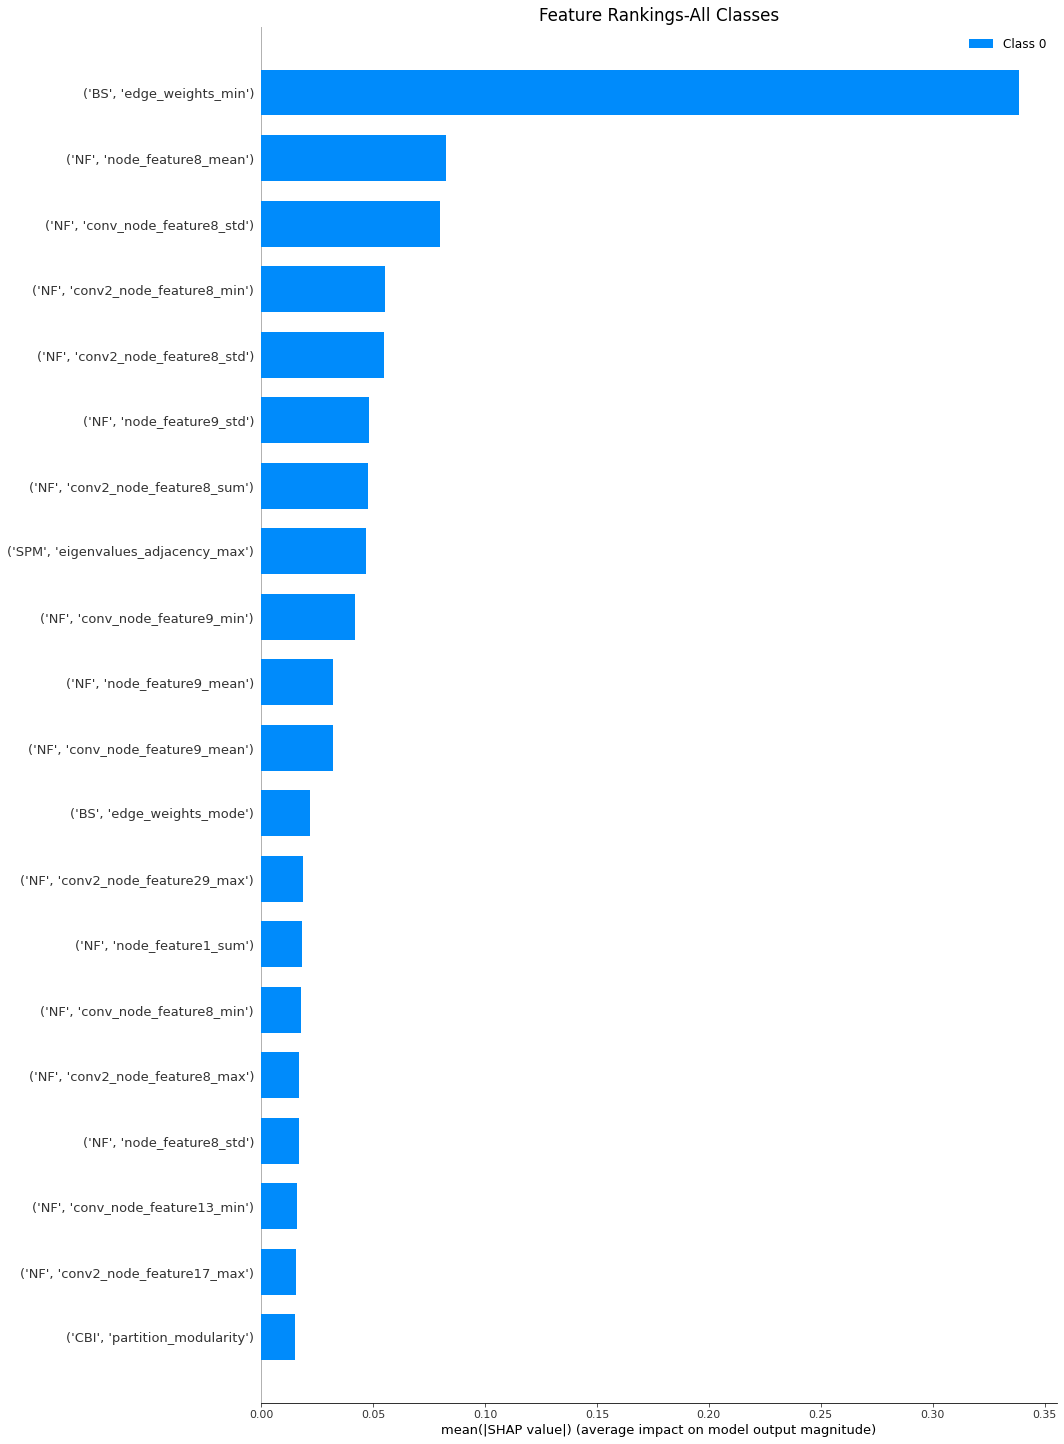

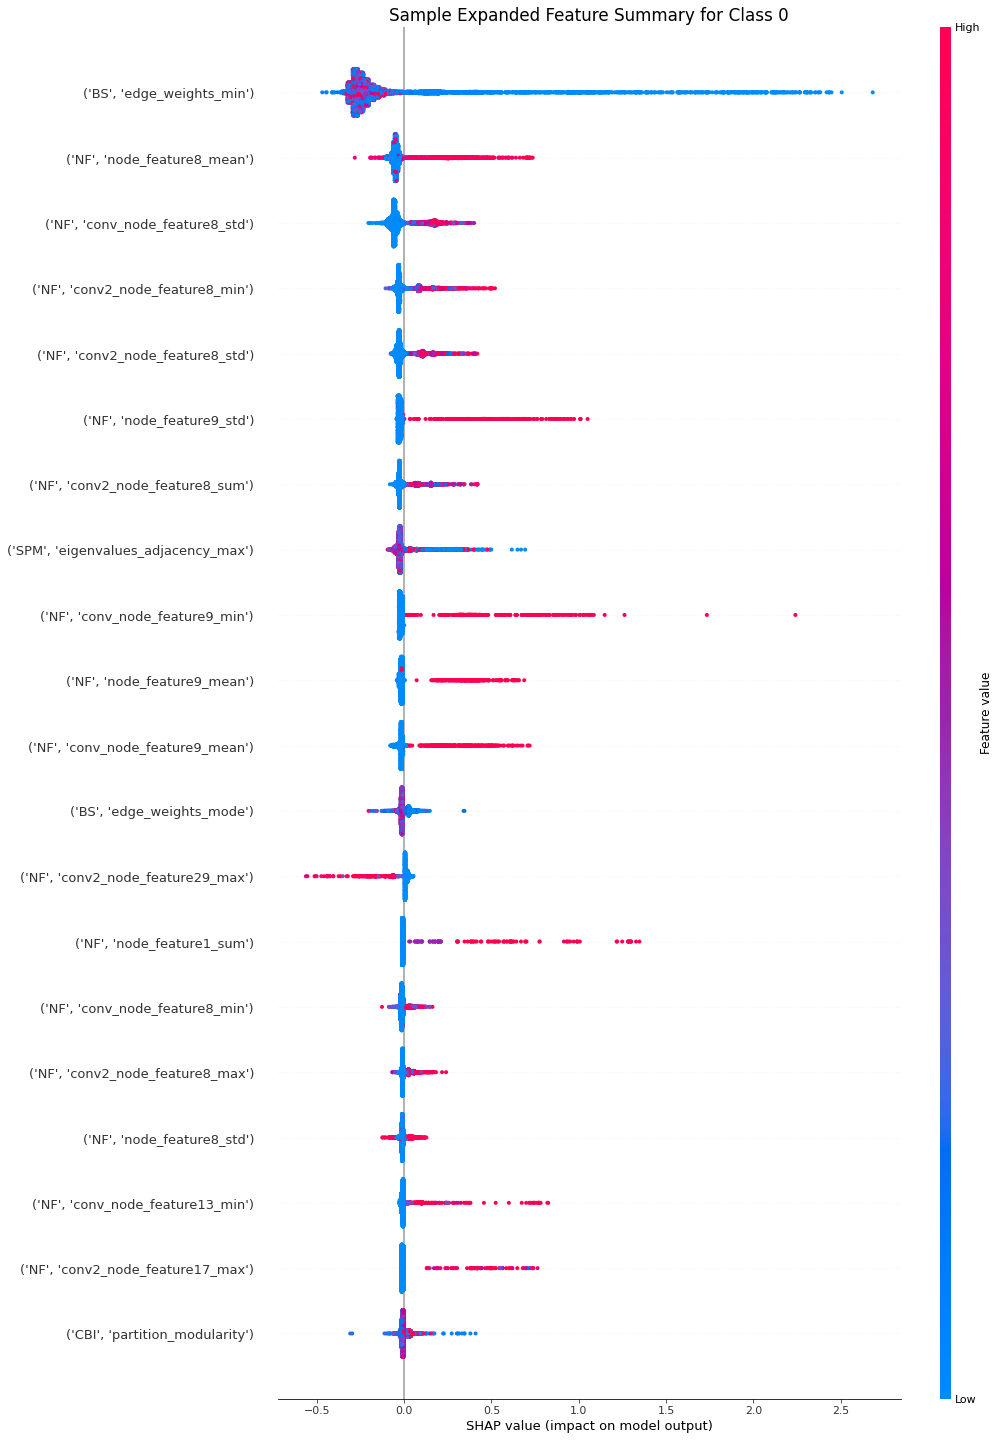

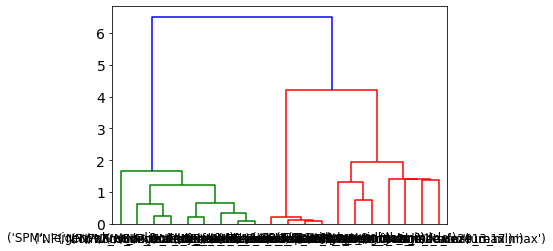

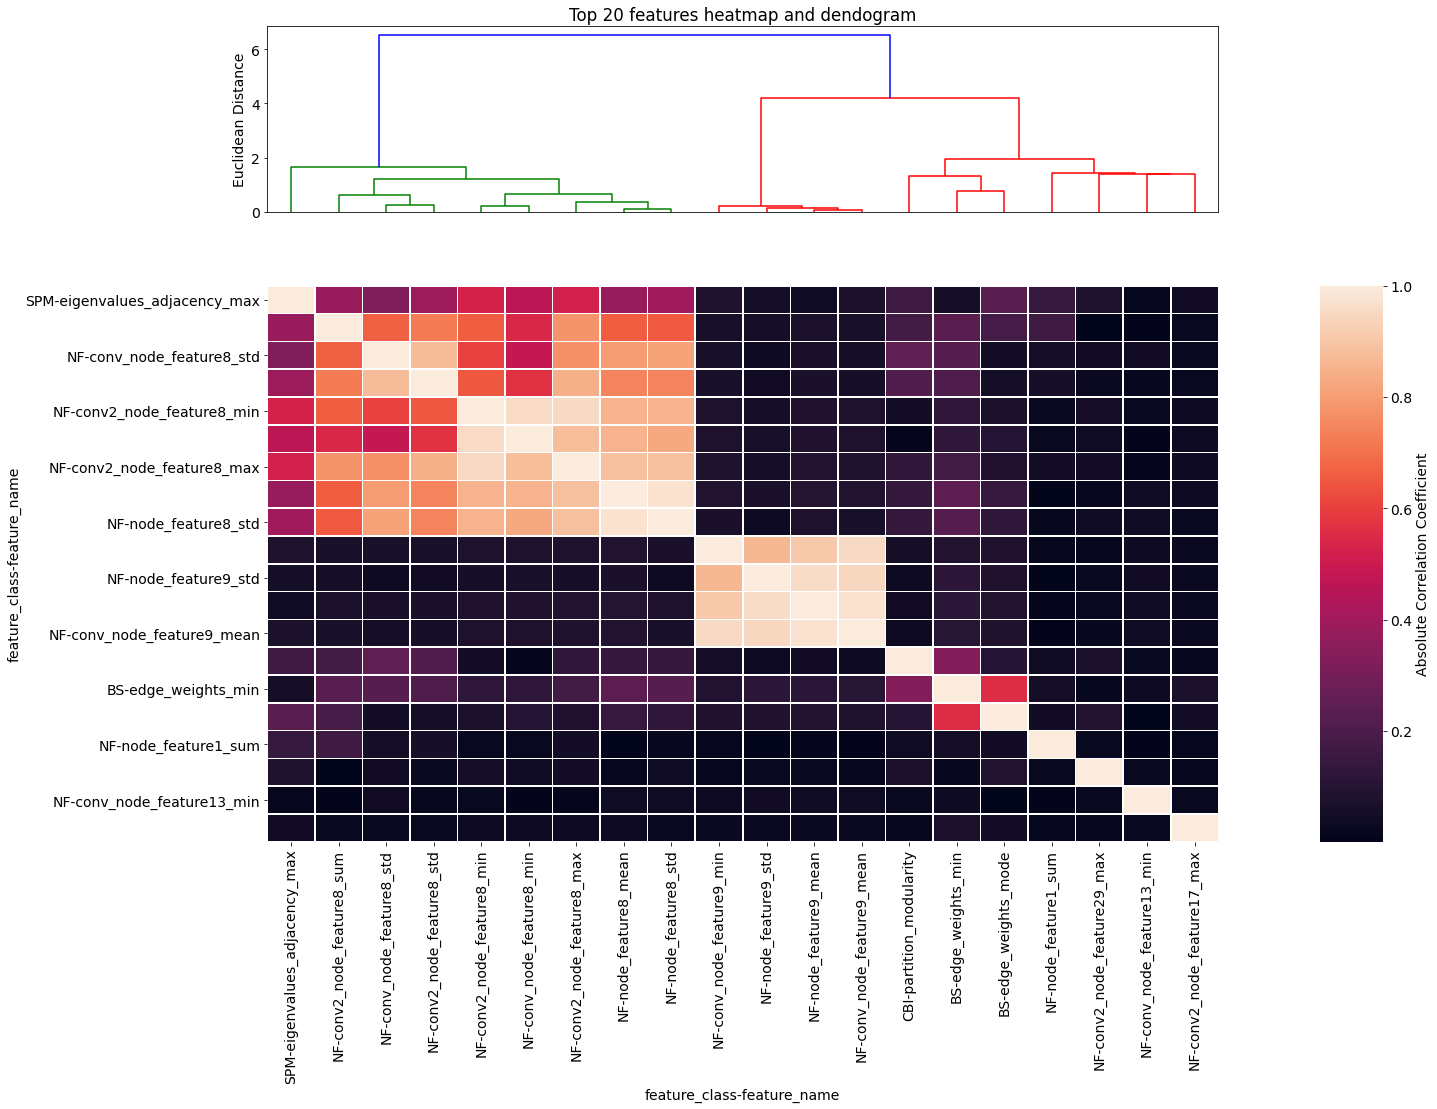

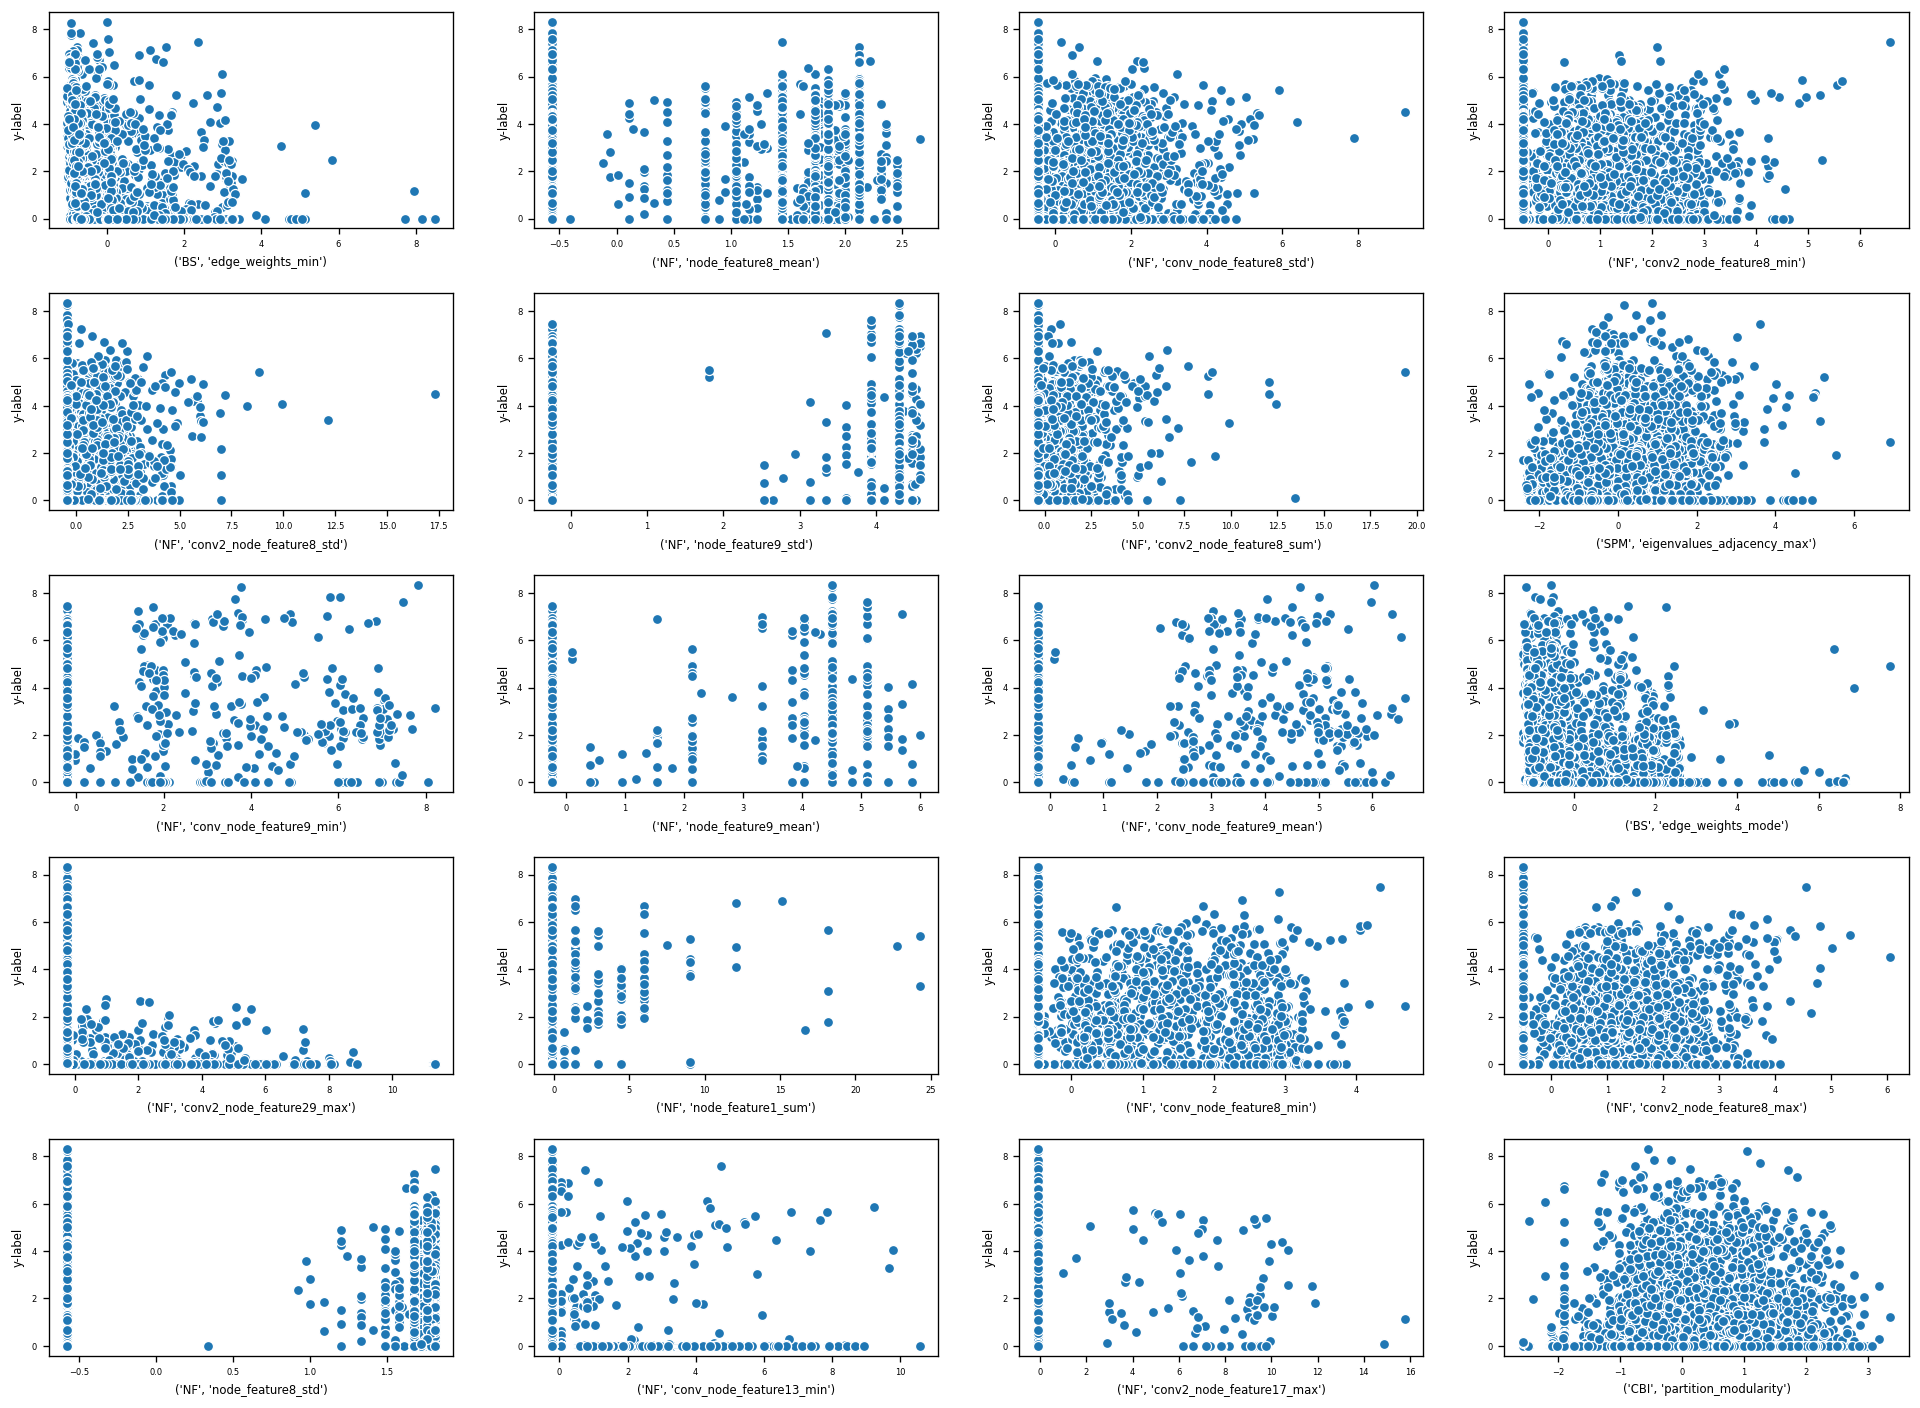

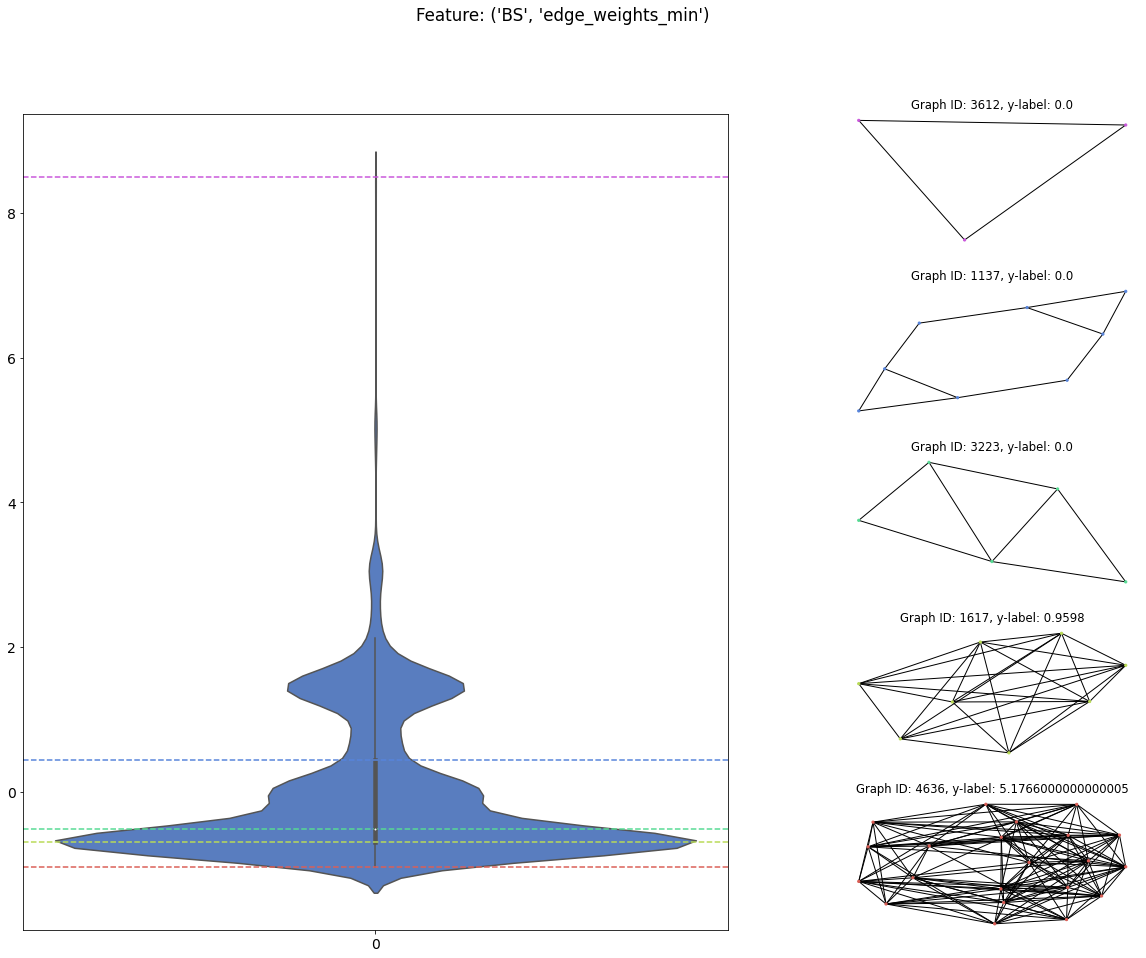

In [22]:
# implement a regression analyse of the features
h.analyse_features(feature_file='./results/custom_dataset_molecules/all_features.pkl',
                   analysis_type='regression',
                   results_folder='./results/custom_dataset_molecules')


# Analysis -regression example - shear moduli

In [26]:
feature_matrix = h.features

In [27]:
for idx in feature_matrix.index:
    feature_matrix.loc[idx,'labels'] = np.log10(G[idx])

In [28]:
h.features = feature_matrix

In [29]:
h.save_features('./results/custom_dataset_molecules/all_features_G.pkl')


INFO:hcga.analysis:2727 total features
INFO:hcga.utils:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:1652 valid features
INFO:hcga.analysis:1652 with interpretability 1
INFO:hcga.analysis:... Using Xgboost regressor ...
INFO:hcga.analysis:Using kfold
INFO:hcga.analysis:Mean Absolute Error: --- 0.114 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.115 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.123 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.117 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Mean Absolute Error: --- 0.111 ---
Setting feature_perturbation = "tree_path_dependent" because no background da

Sample Expanded Feature Summary for Class 0


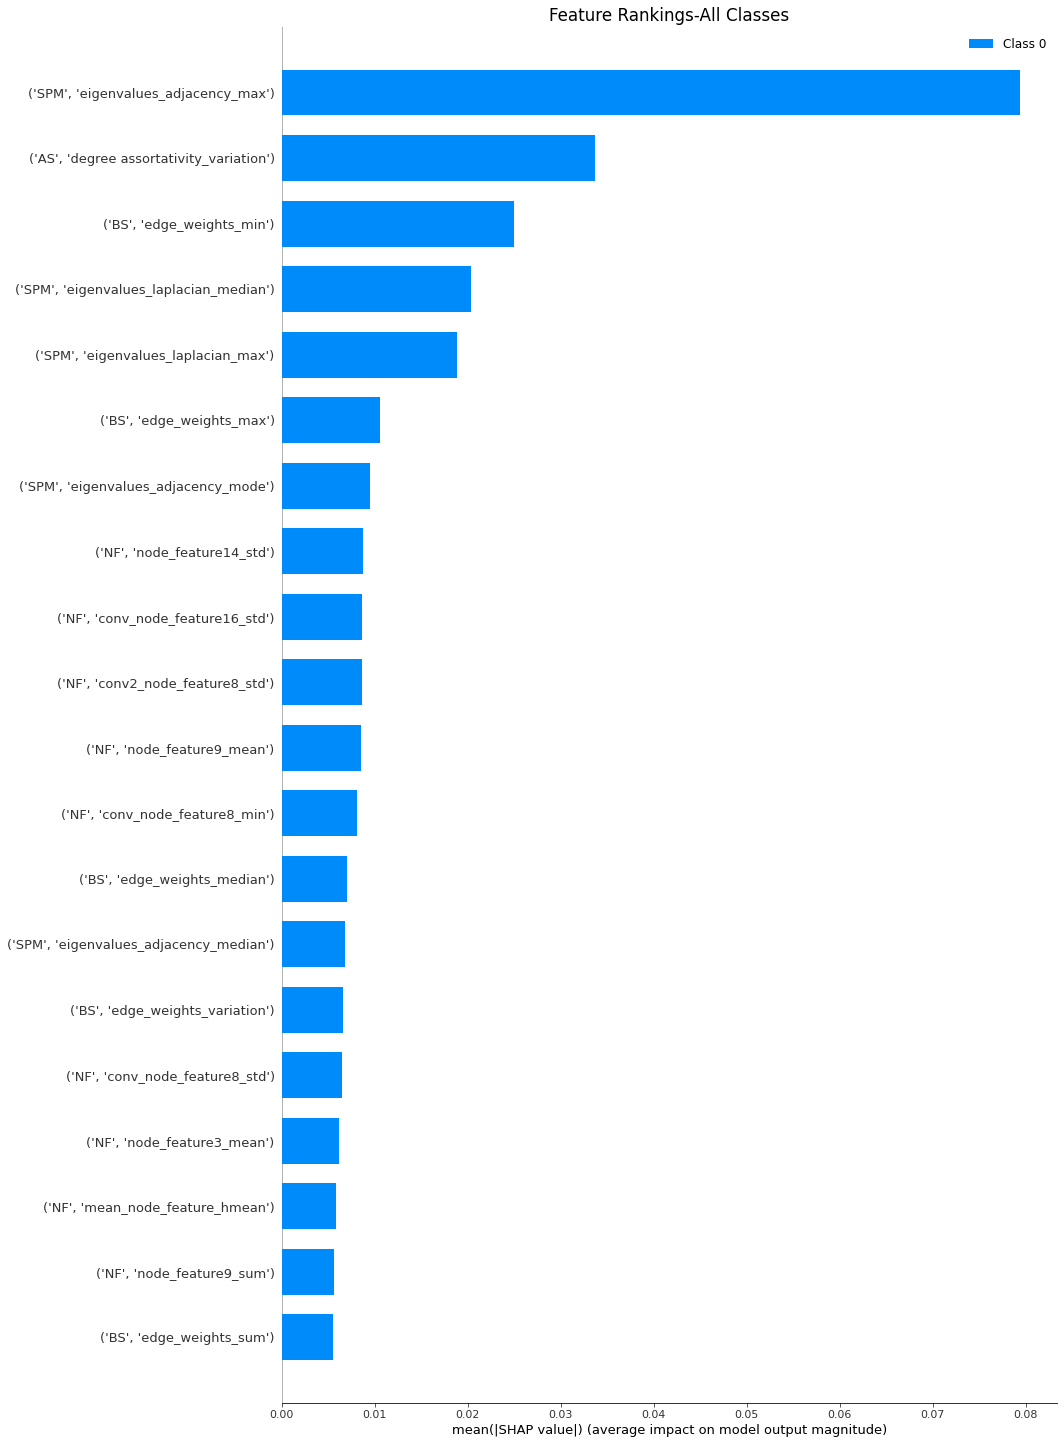

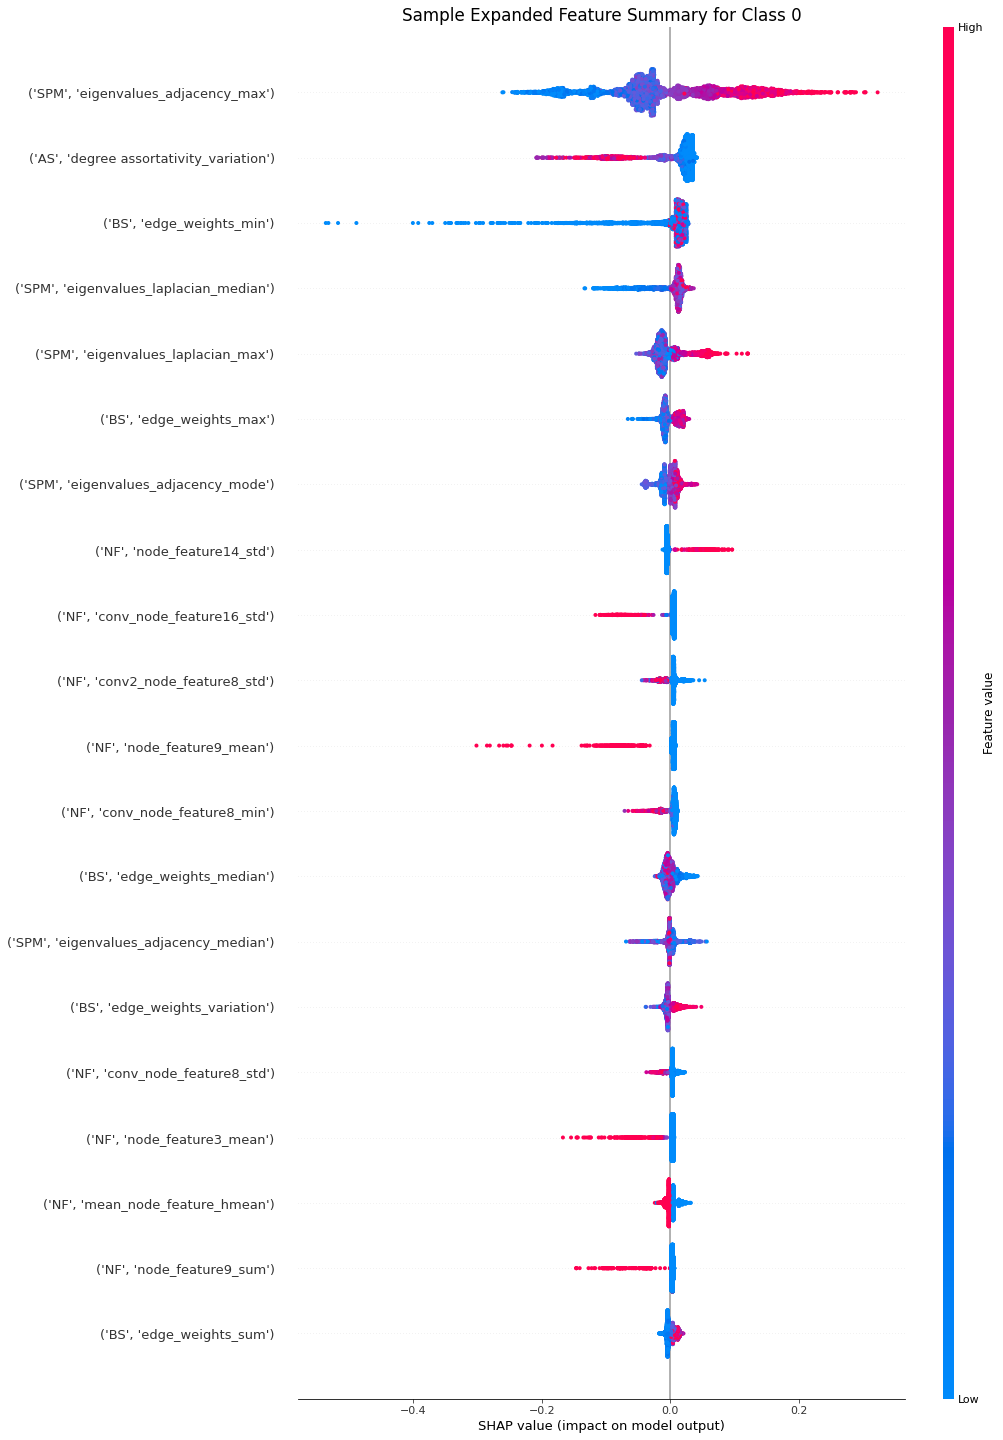

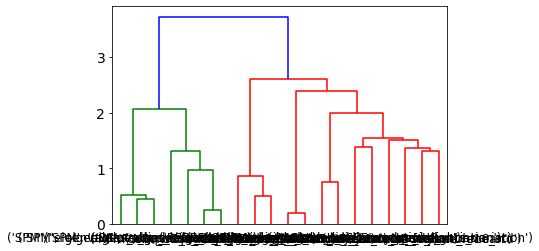

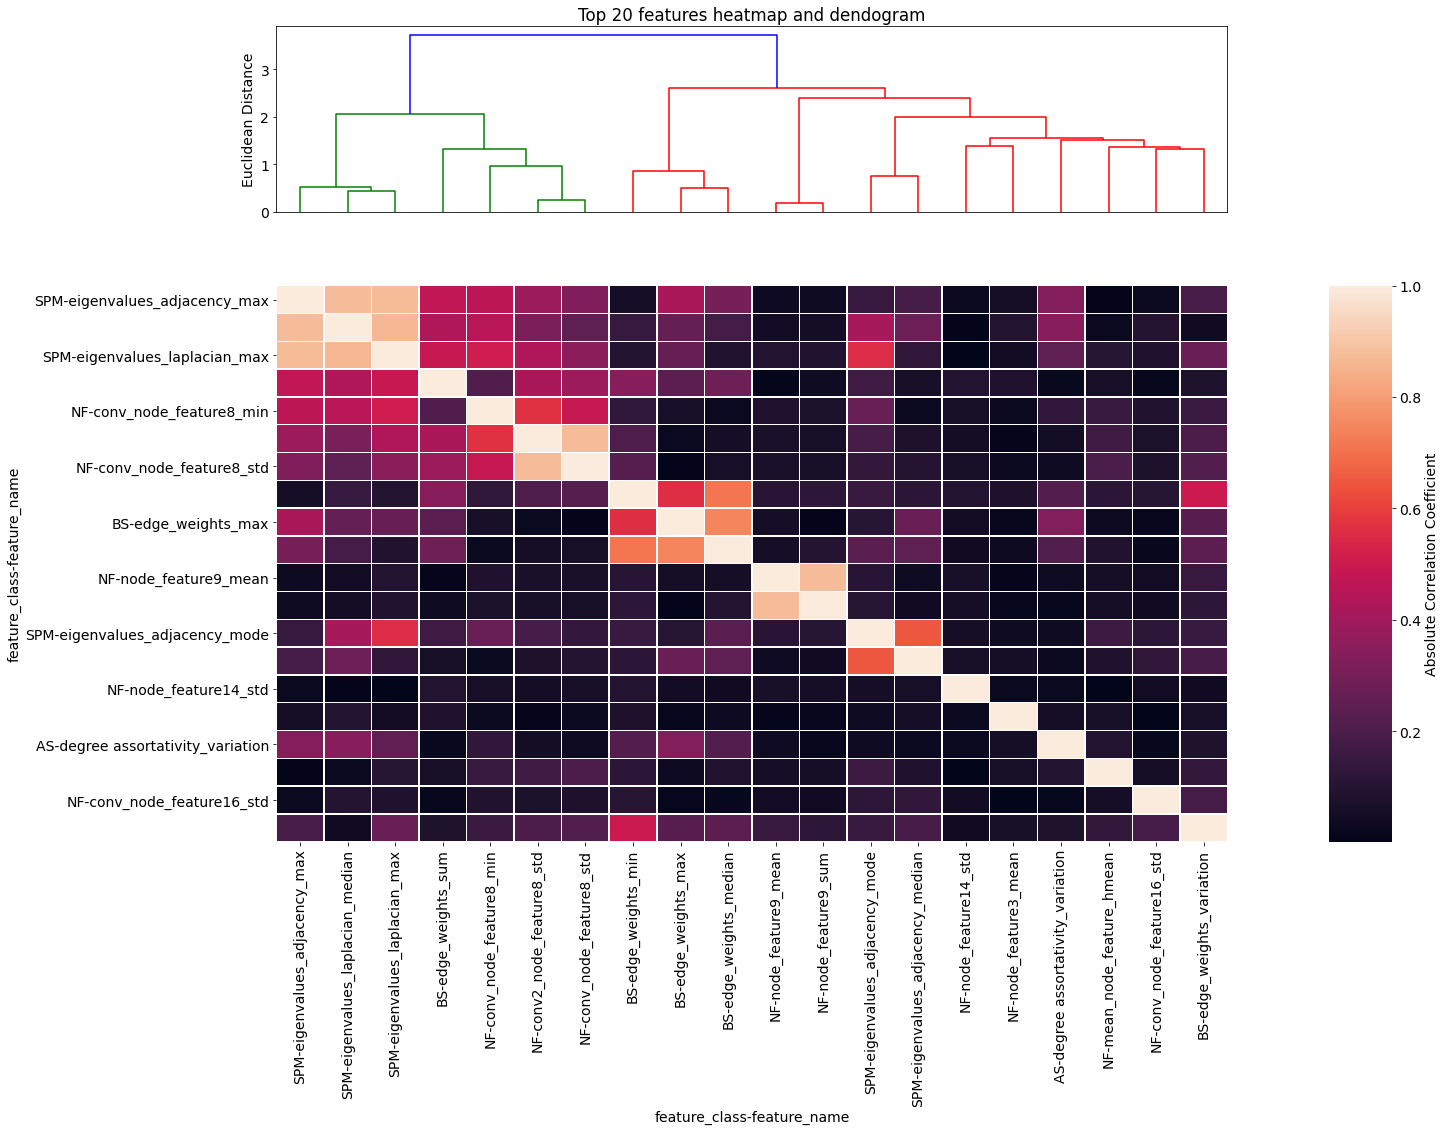

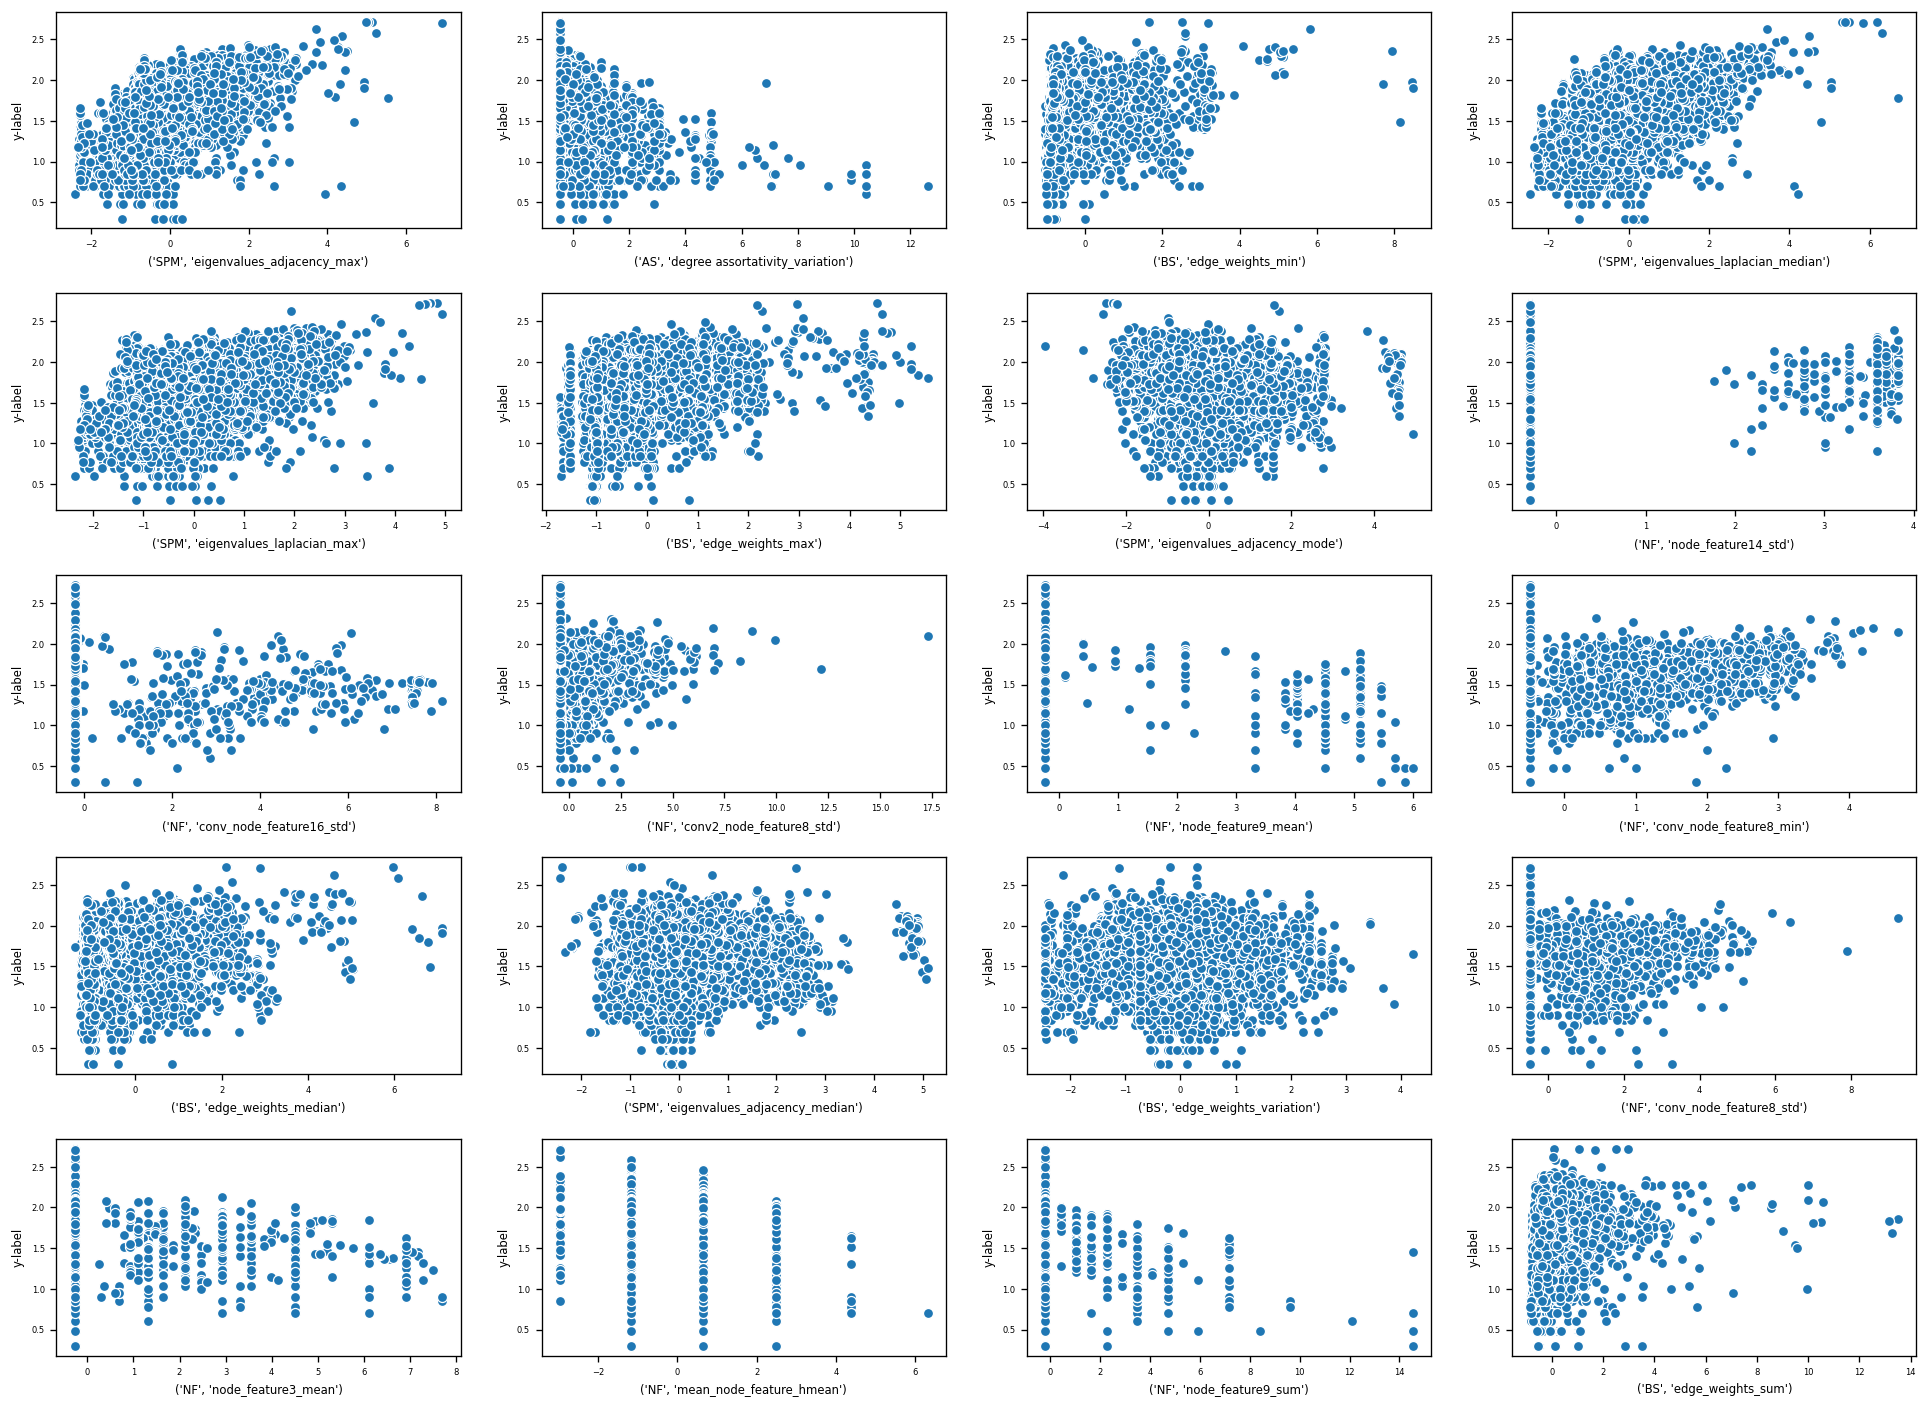

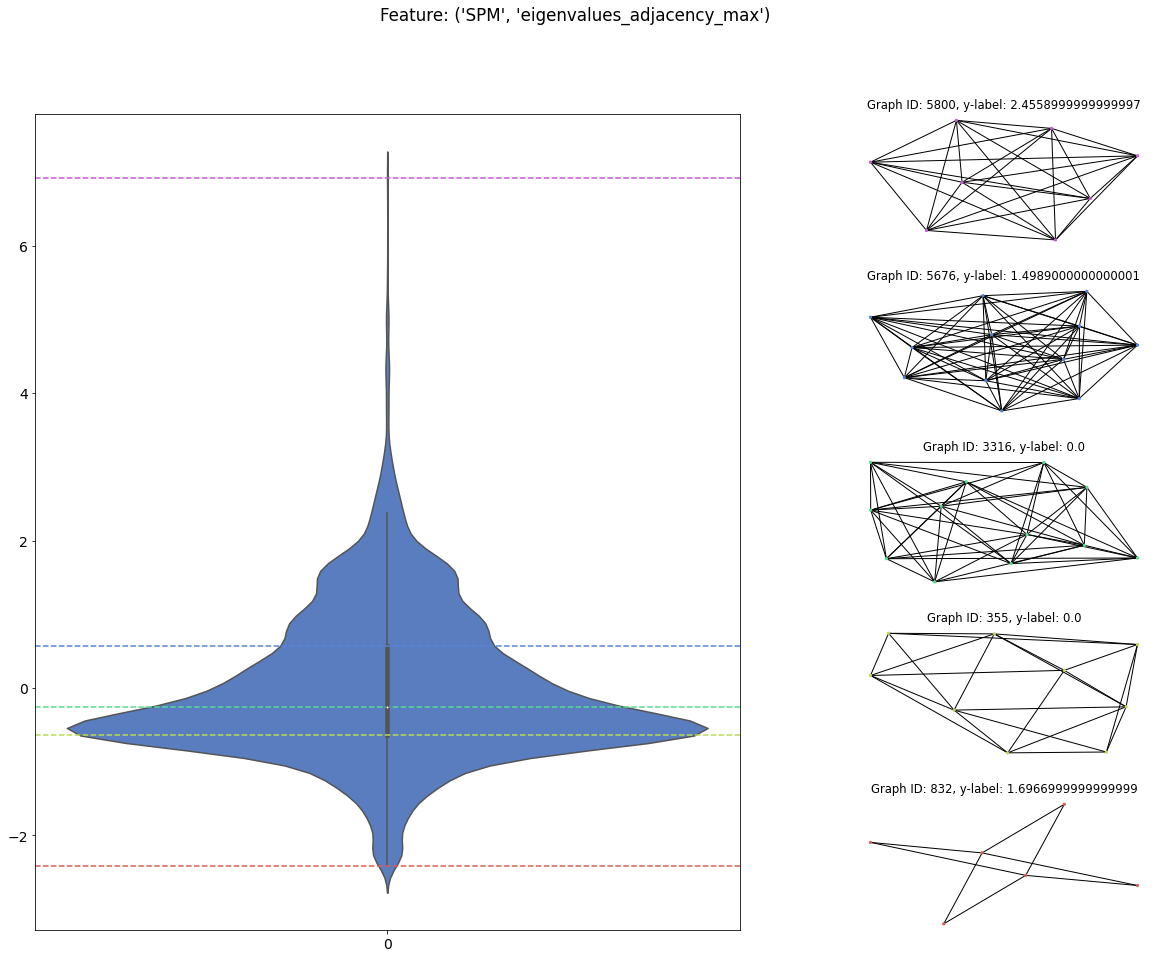

In [30]:
h.analyse_features(feature_file='./results/custom_dataset_molecules/all_features_G.pkl',
                   analysis_type='regression',
                   results_folder='./results/custom_dataset_molecules')


In [ ]:
feature_matrix

